In [10]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
#import plotly.express as px
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [11]:
df_house = pd.read_csv('kc_house_data.csv')
df_house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [95]:
#clean date
# clean_date = df_house.date.apply(lambda x: x.split('T')[0])
# clean_date

#clean date column
# df_house['date'] = clean_date
# df_house.head()

#format date column
# df_house['date'] = pd.to_datetime(df_house['date'], format = '%Y/%m/%d')
# df_house.head()
df_house.drop('date', inplace=True, axis=1)
df_house.drop('waterfront', inplace=True, axis=1)
df_house.drop('view', inplace=True, axis=1)

In [88]:
#drop id column
df_house = df_house.drop(['id'], axis=1)

In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.3 MB


In [42]:
#change price to int
df_house.price = df_house.price.astype(np.int64)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256439CEE08>,
      dtype=object)

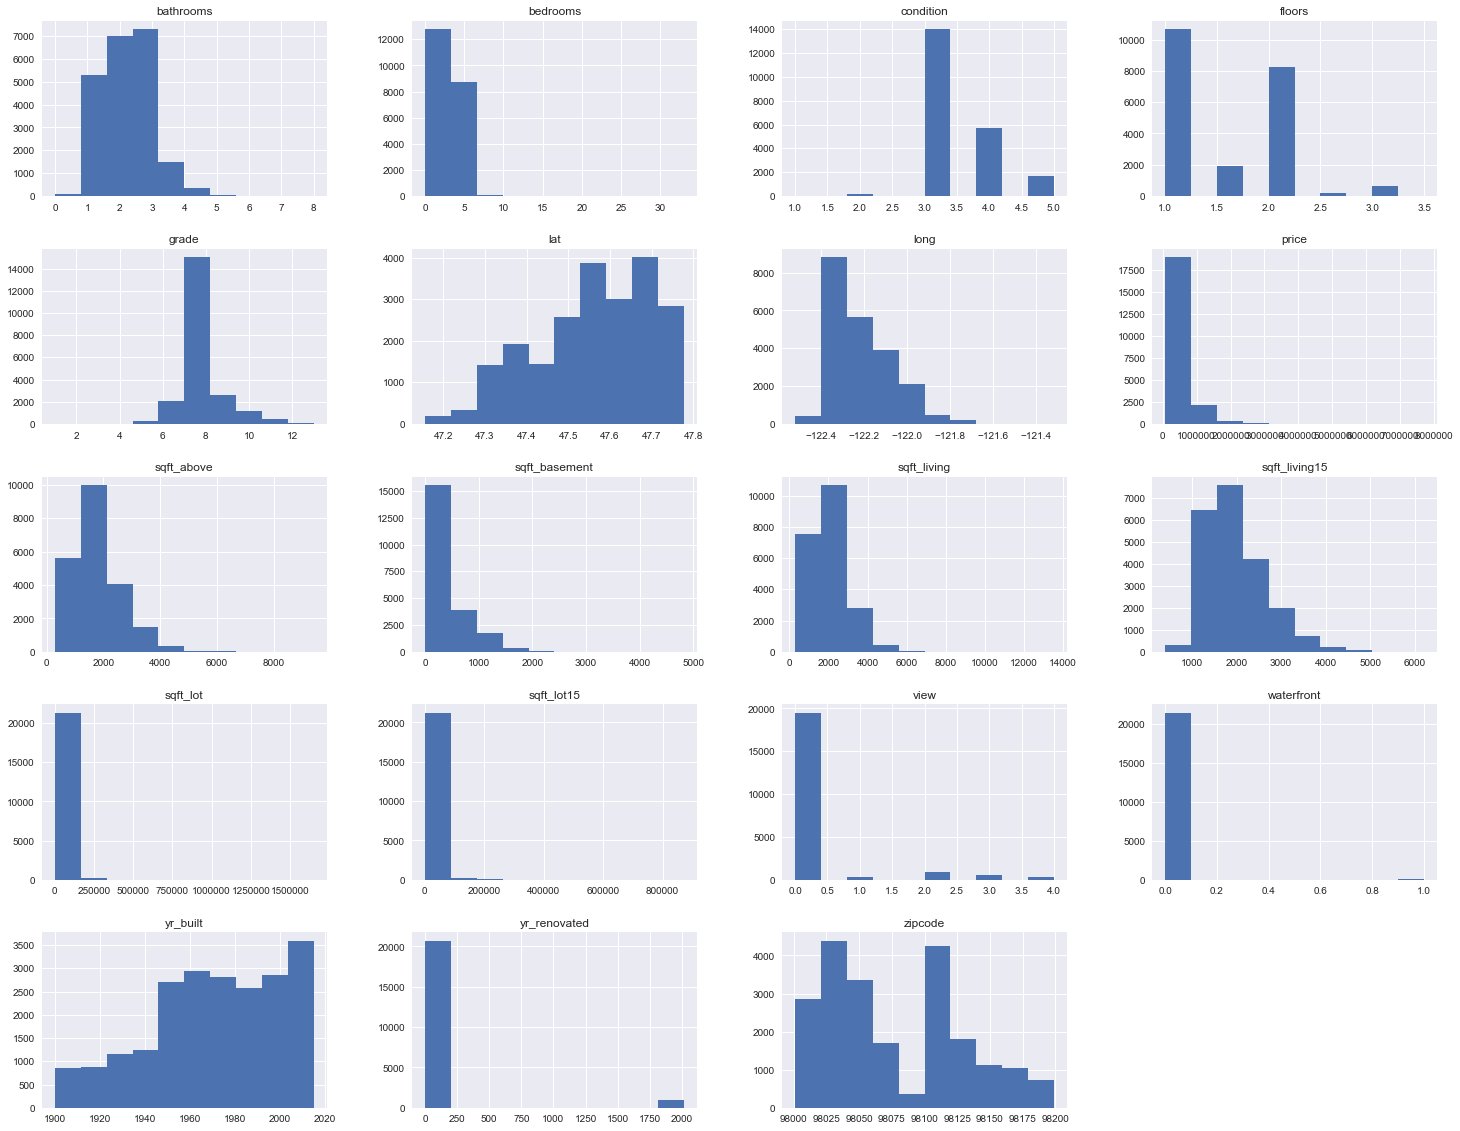

In [8]:
df_house.hist(figsize=(25,20))

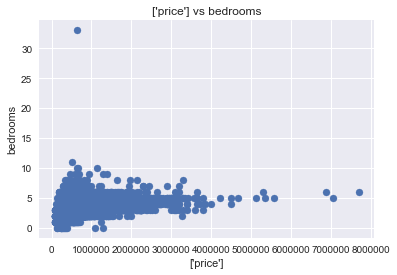

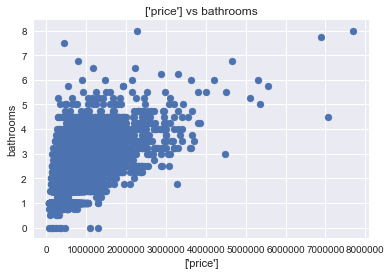

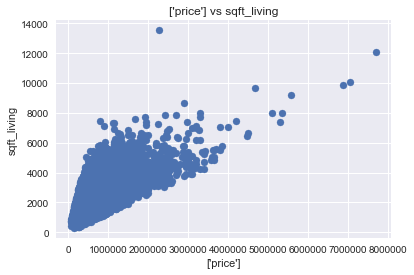

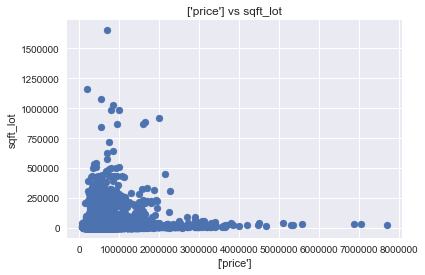

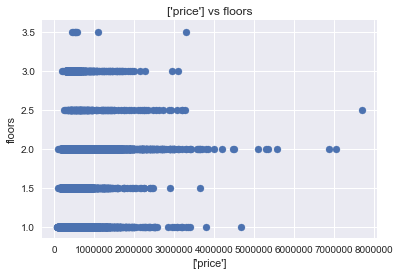

KeyError: 'waterfront'

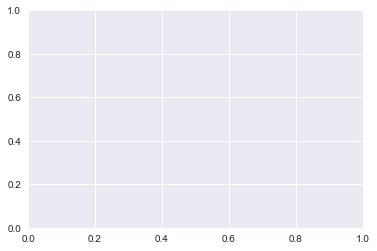

In [61]:
#loop for scatter plots showing relationship to price  

columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
              'floors','waterfront','view','condition','grade',
              'sqft_above','sqft_basement','yr_built','yr_renovated',
              'zipcode','sqft_living15','sqft_lot15']

y_columns = ['bedrooms','bathrooms','sqft_living','sqft_lot',
              'floors','waterfront','view','condition','grade',
              'sqft_above','sqft_basement','yr_built','yr_renovated',
              'zipcode','sqft_living15','sqft_lot15']

x_col = ["price"]



for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_house[x_col], df_house[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.show()

In [10]:
df_house.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      

In [11]:
df_house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

 kc_house_data - Regression Analysis and Diagnostics for Price~bedrooms


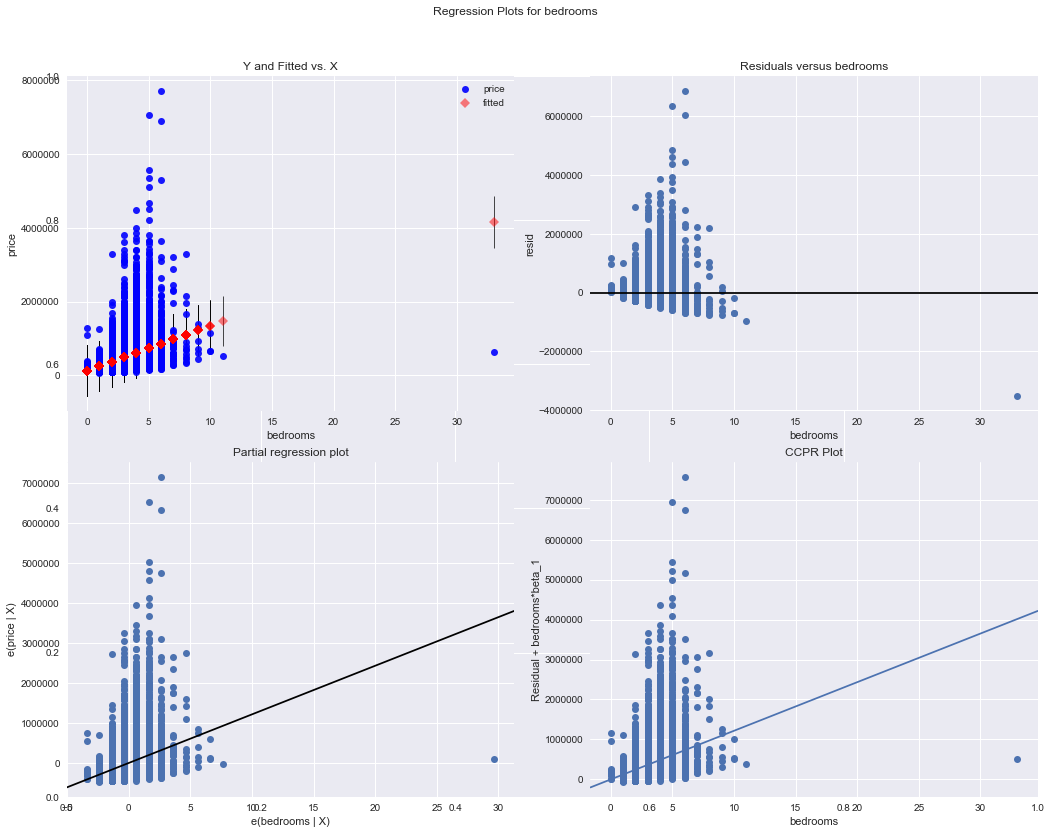

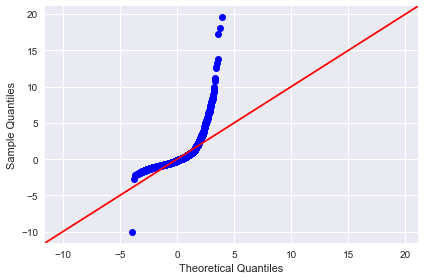

 kc_house_data - Regression Analysis and Diagnostics for Price~bathrooms


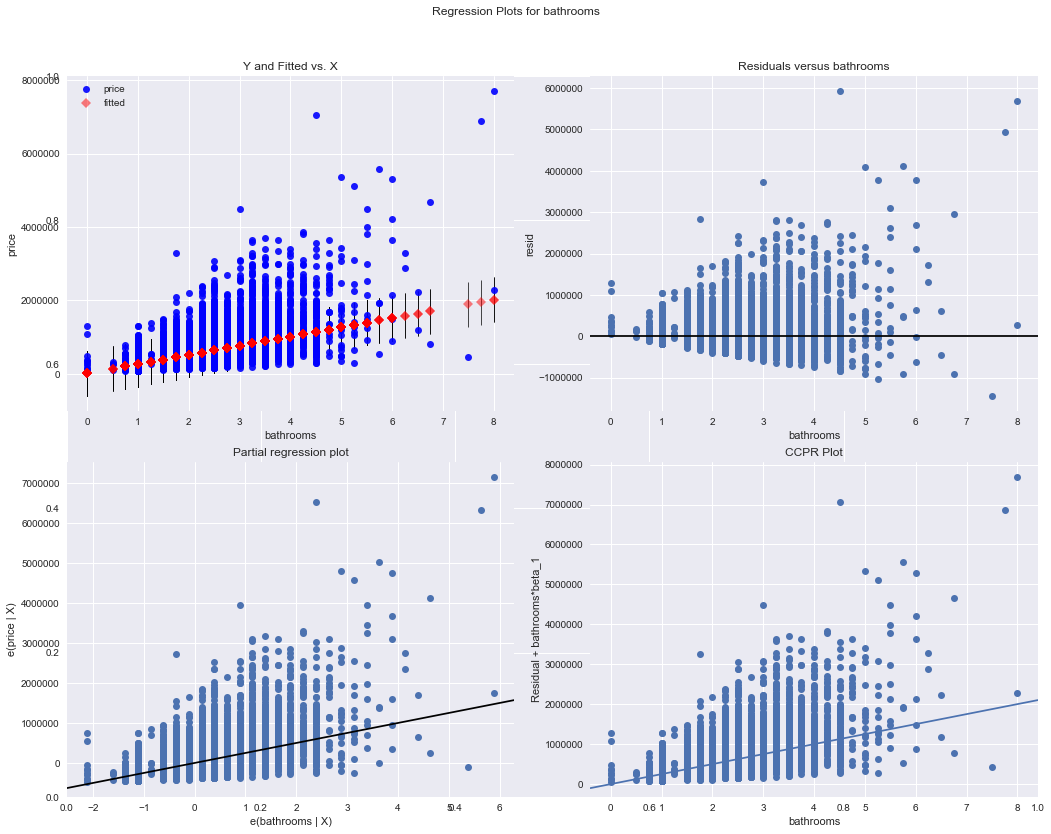

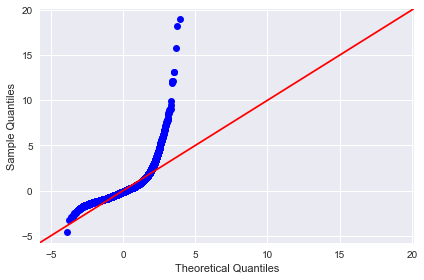

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_living


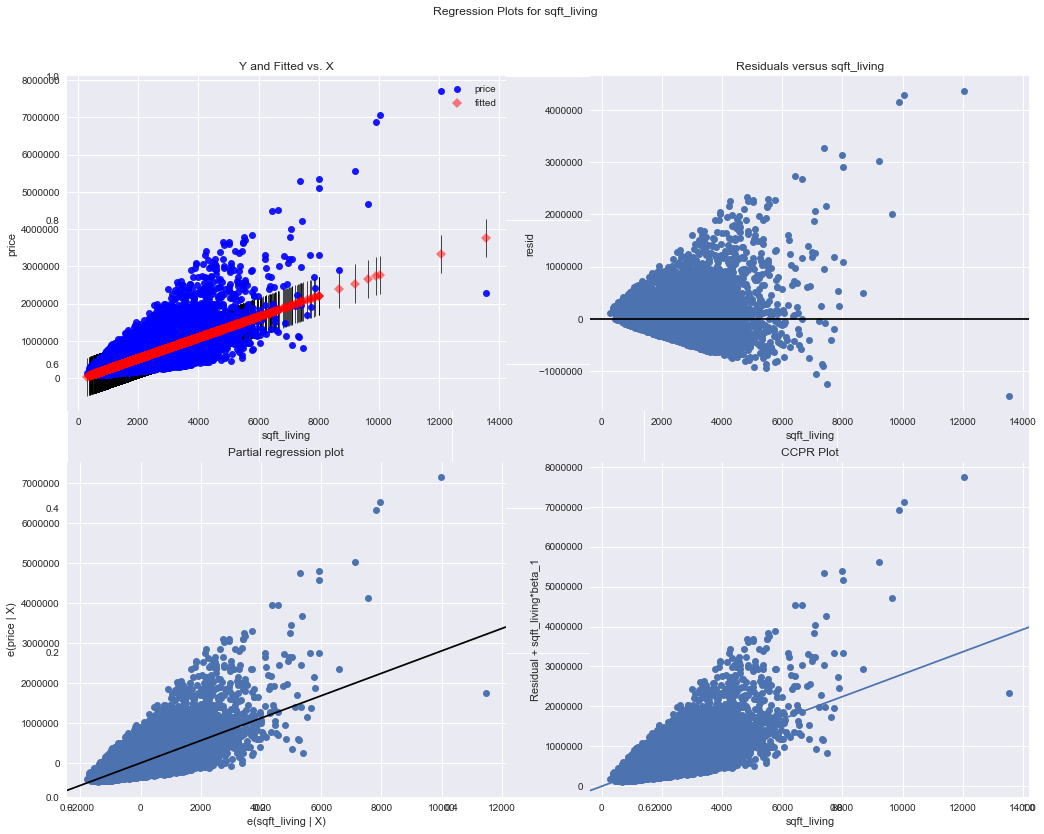

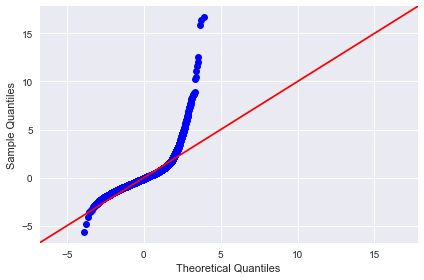

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_lot


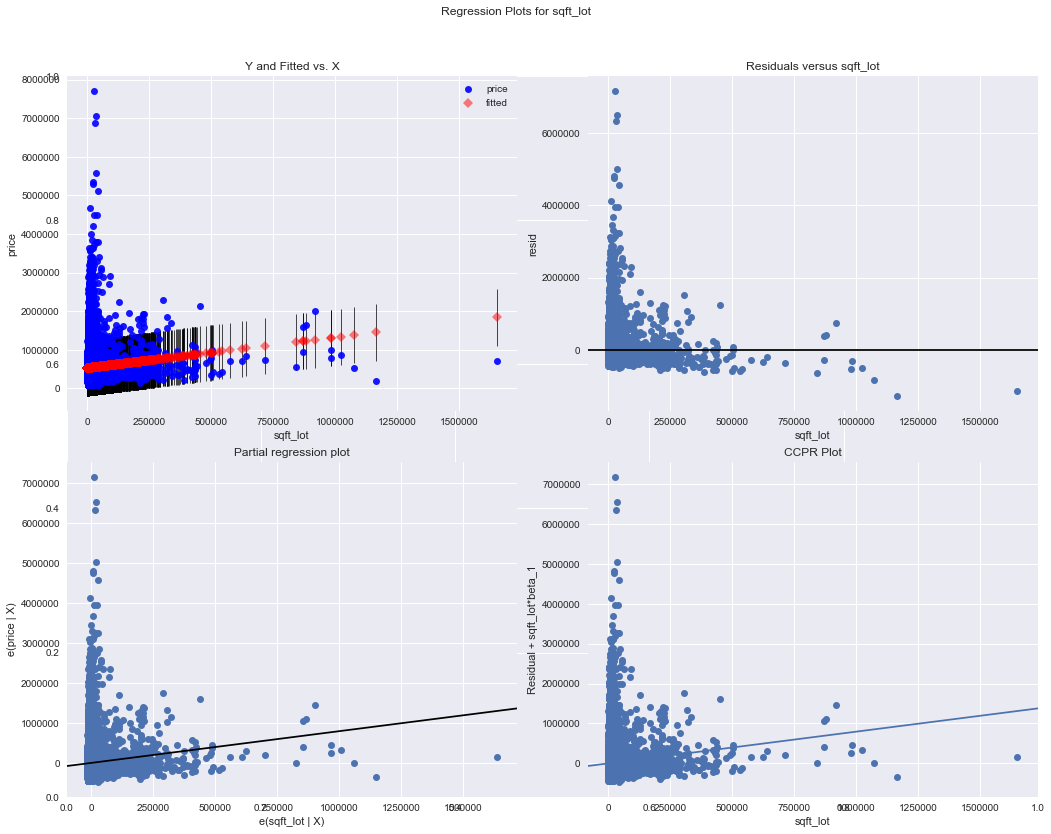

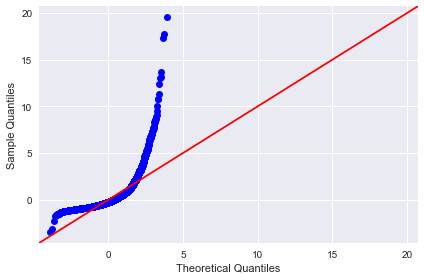

 kc_house_data - Regression Analysis and Diagnostics for Price~floors


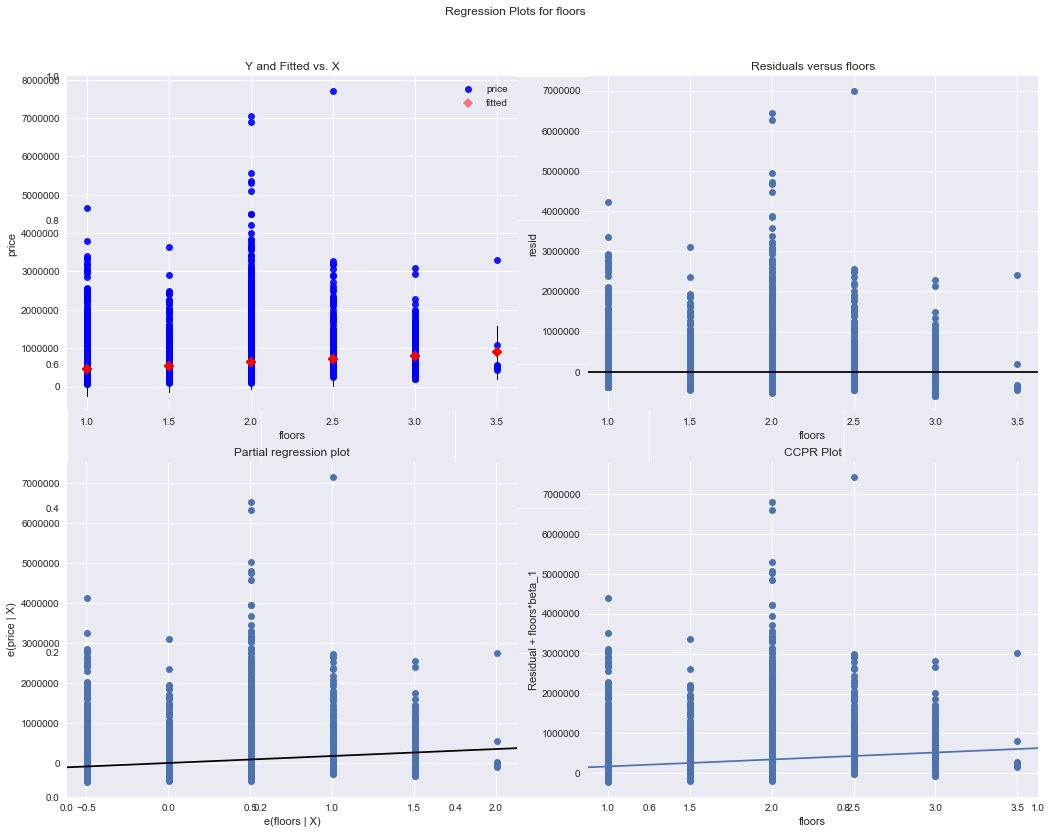

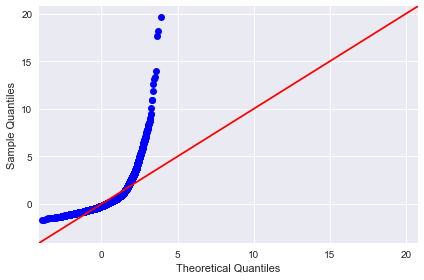

 kc_house_data - Regression Analysis and Diagnostics for Price~waterfront


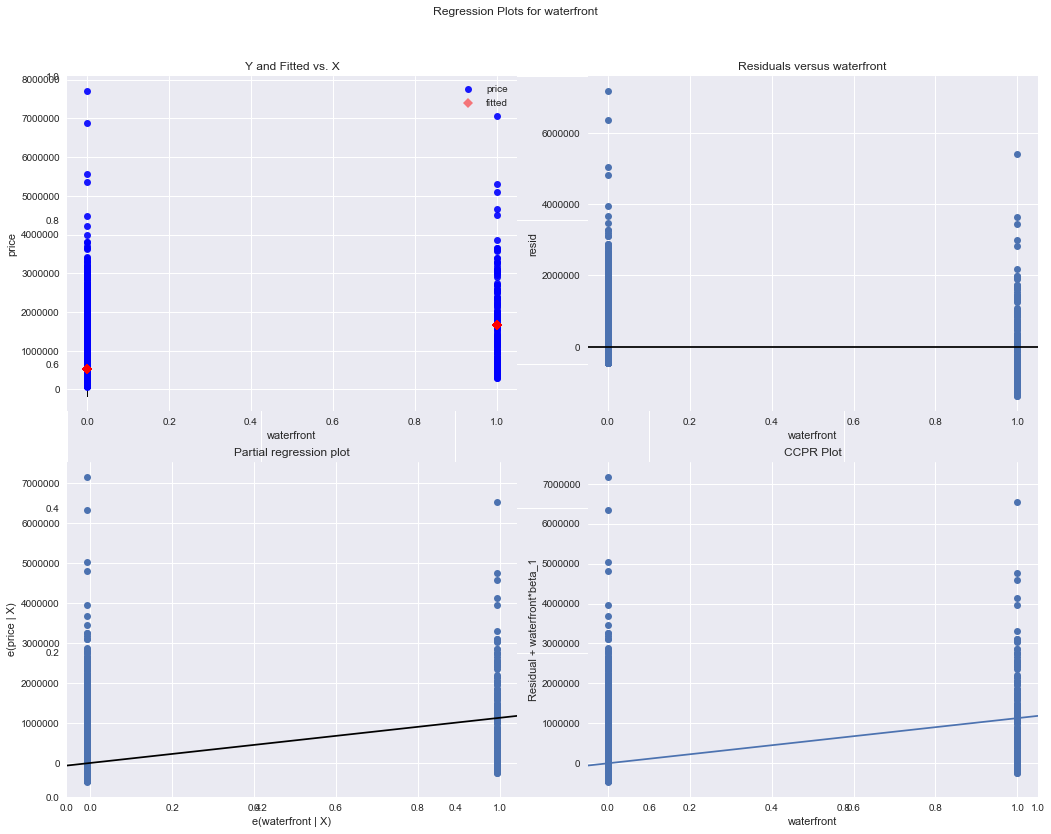

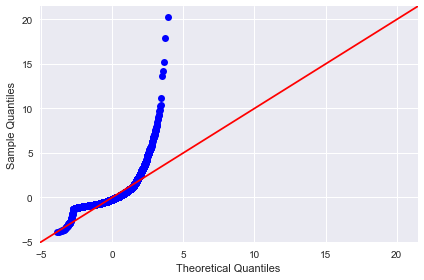

 kc_house_data - Regression Analysis and Diagnostics for Price~view


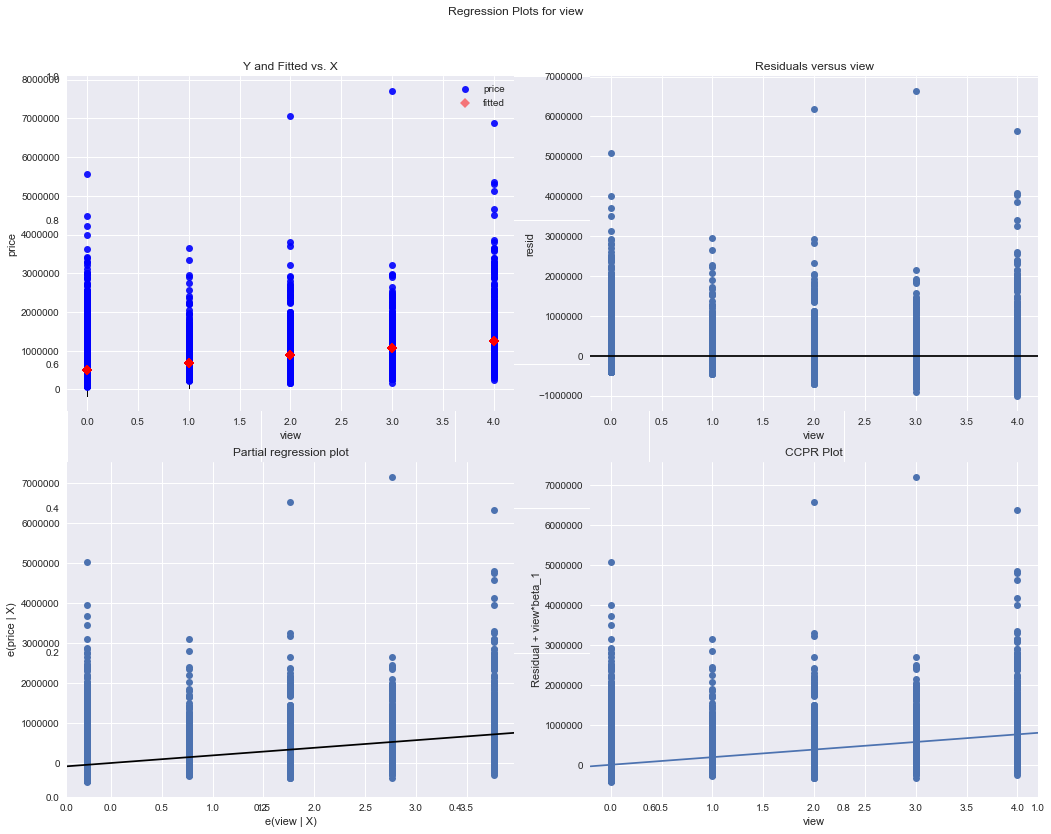

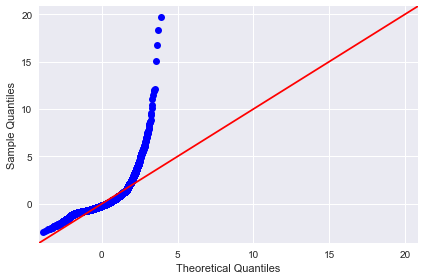

 kc_house_data - Regression Analysis and Diagnostics for Price~condition


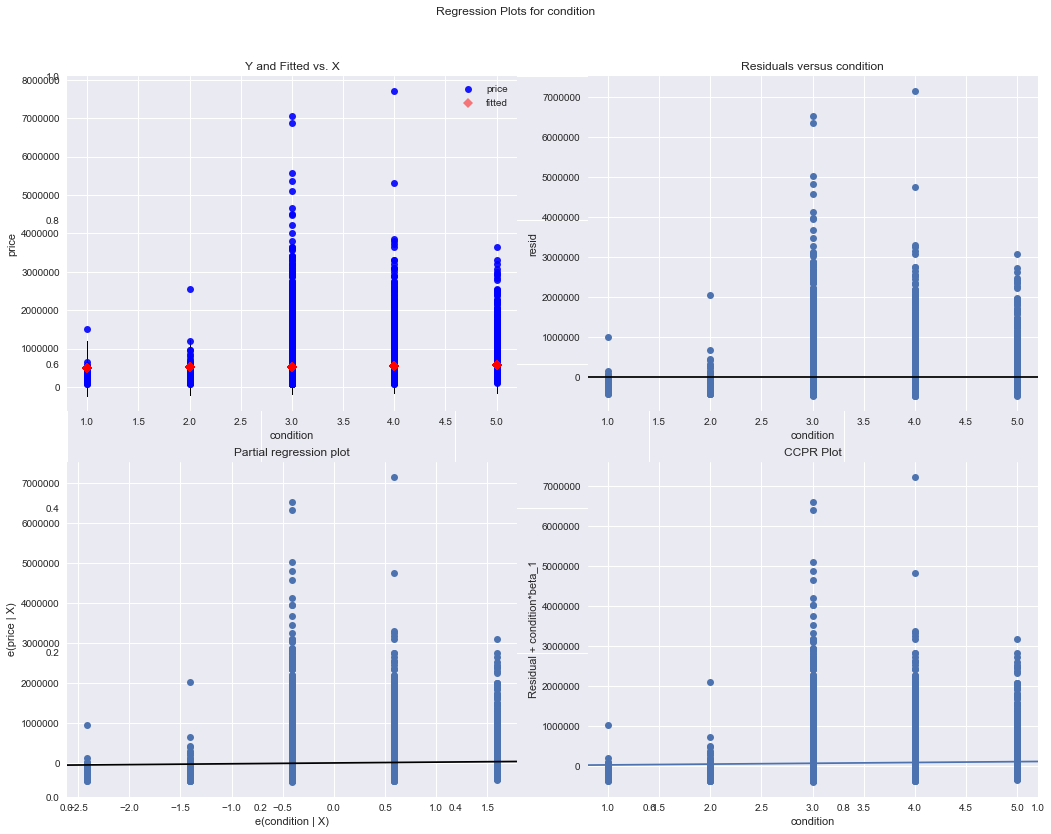

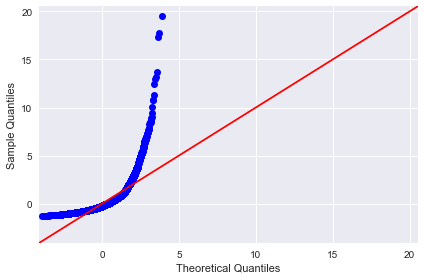

 kc_house_data - Regression Analysis and Diagnostics for Price~grade


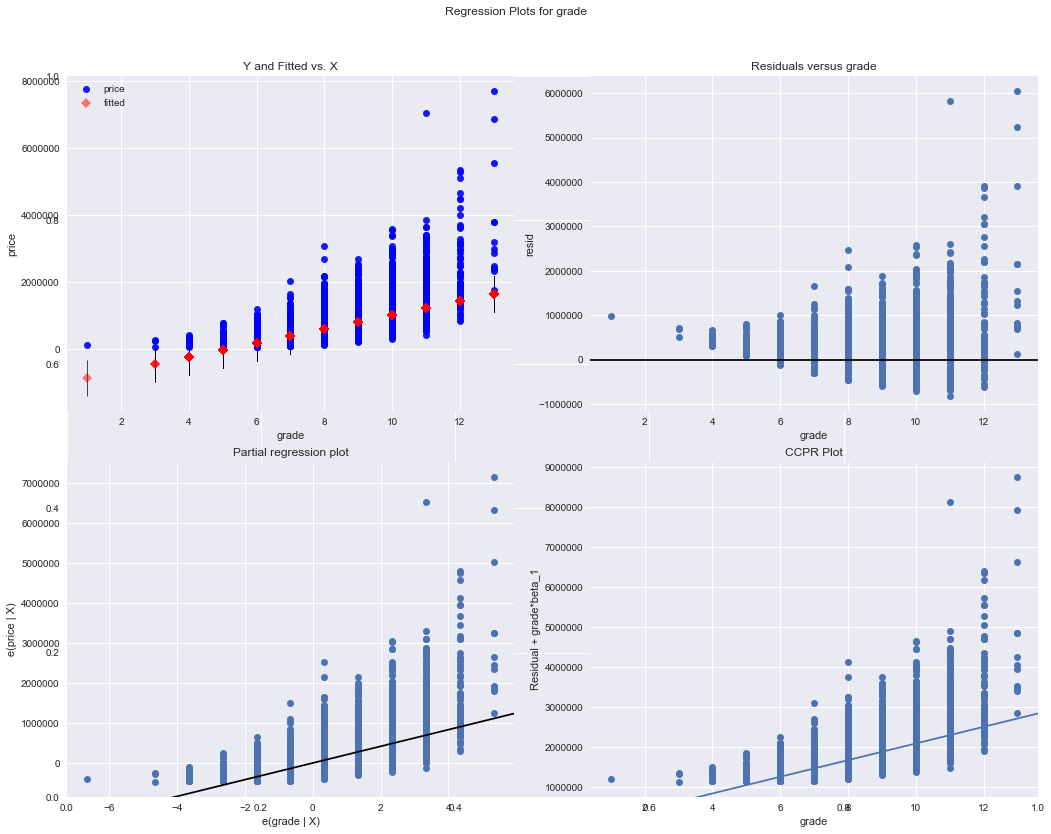

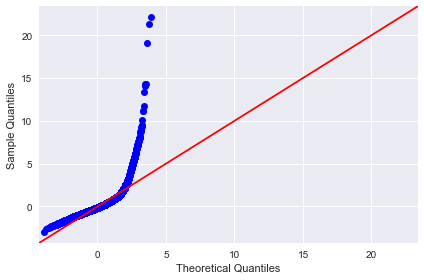

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_above


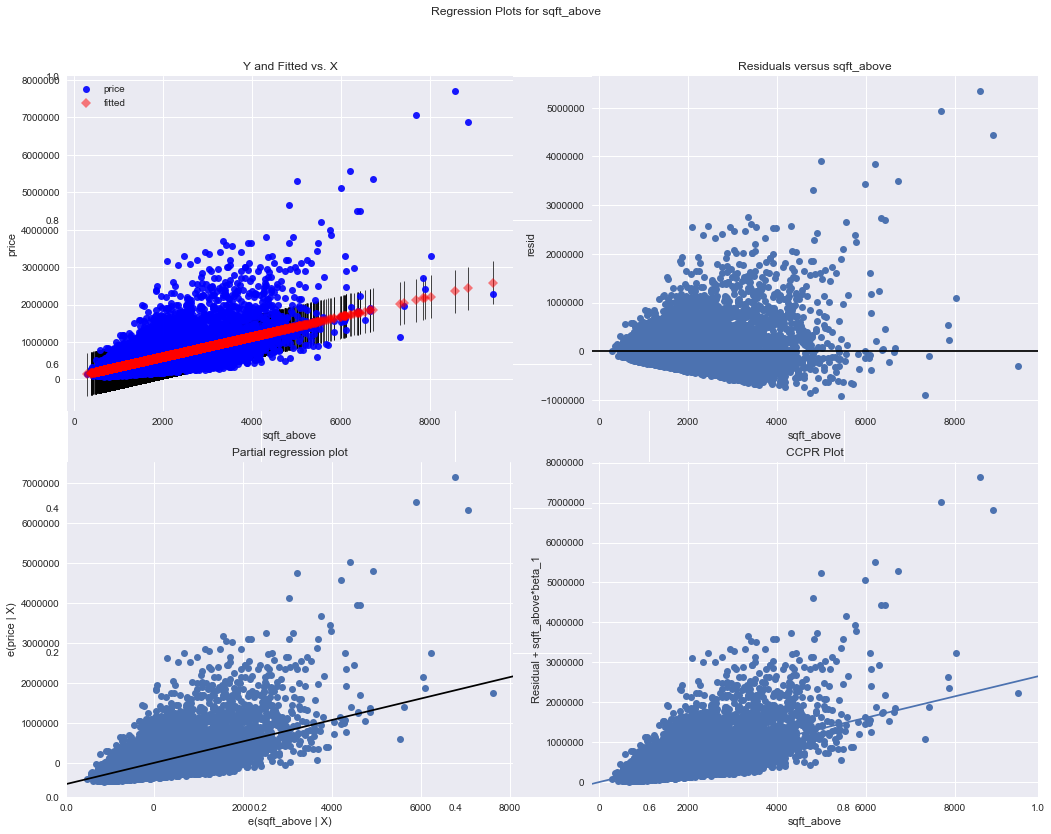

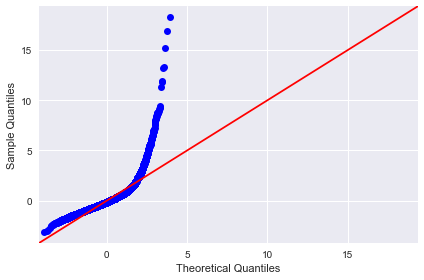

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_basement


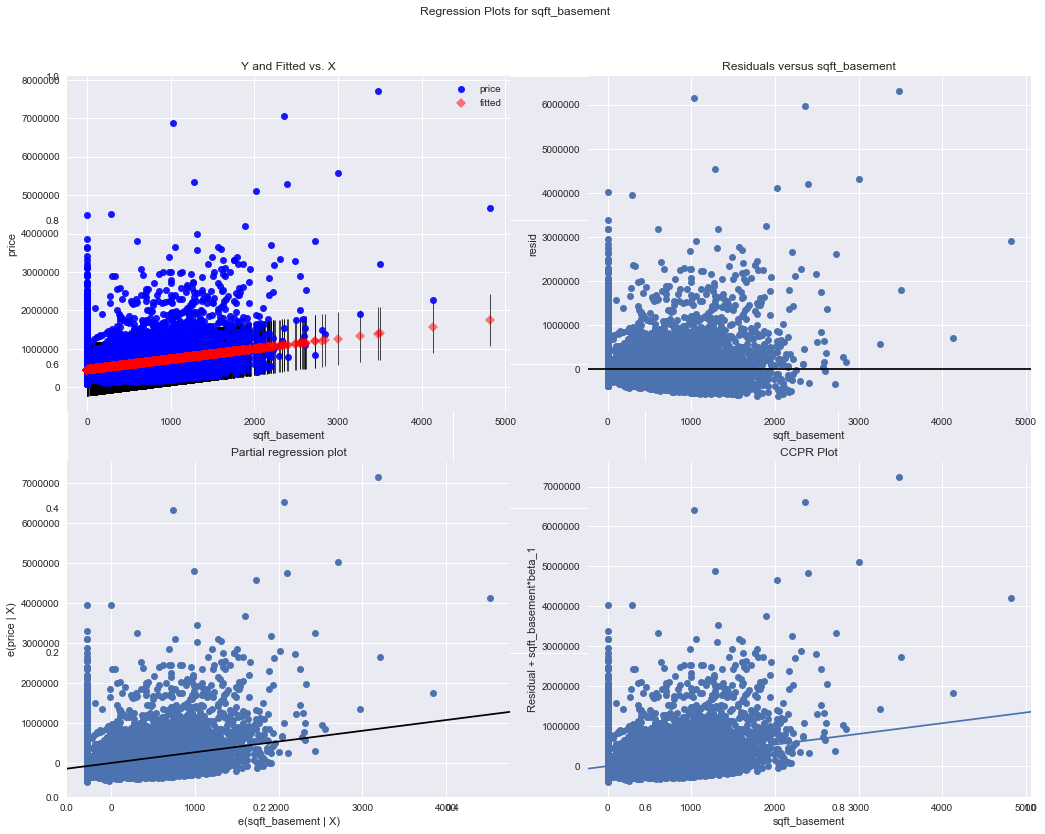

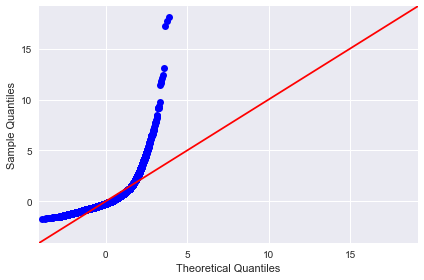

 kc_house_data - Regression Analysis and Diagnostics for Price~yr_built


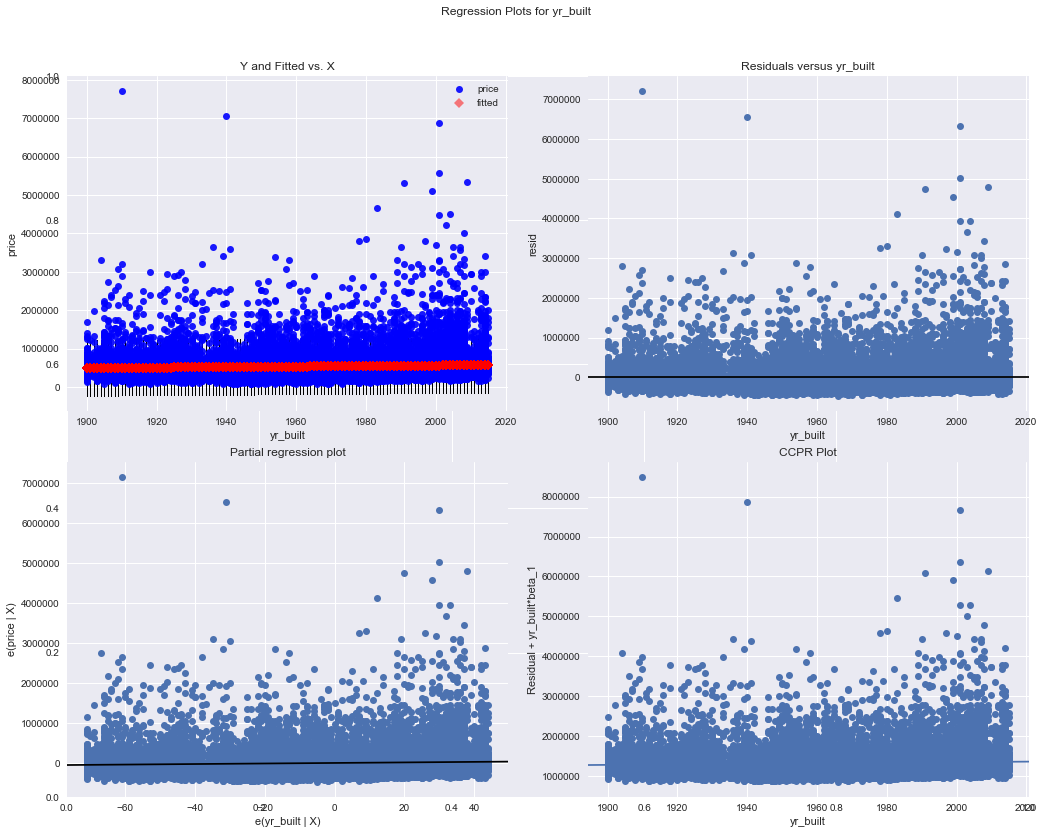

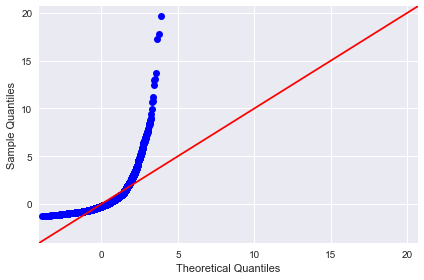

 kc_house_data - Regression Analysis and Diagnostics for Price~yr_renovated


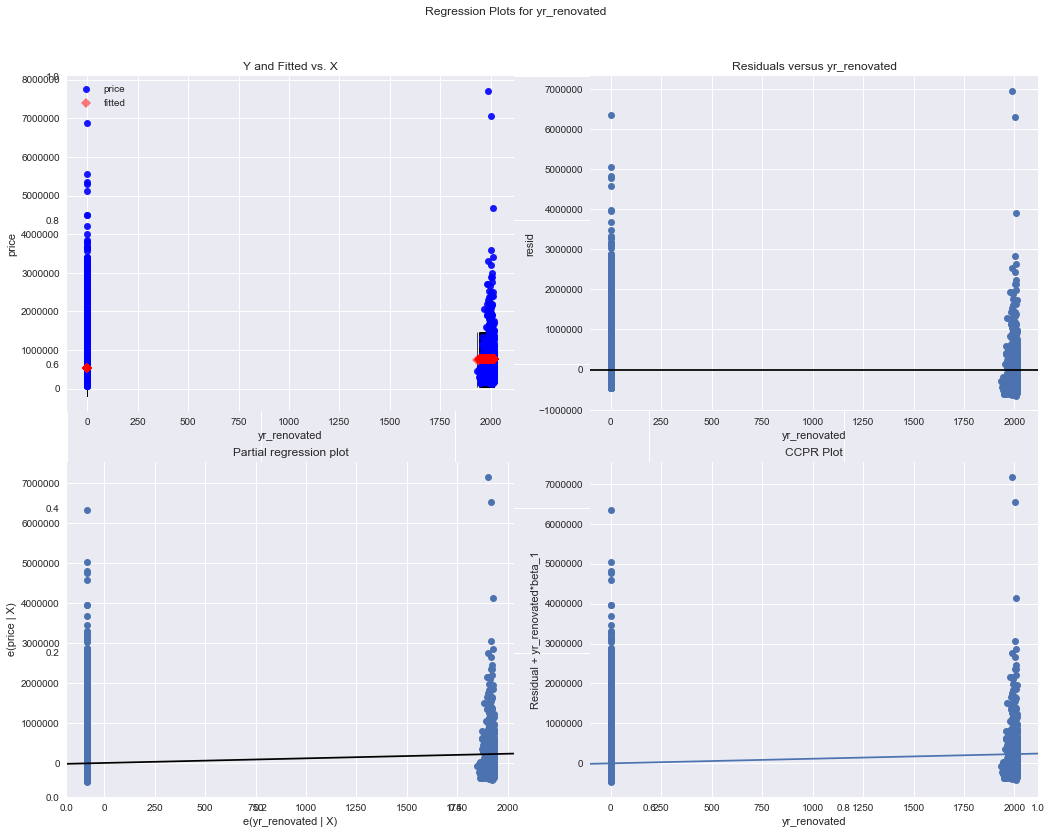

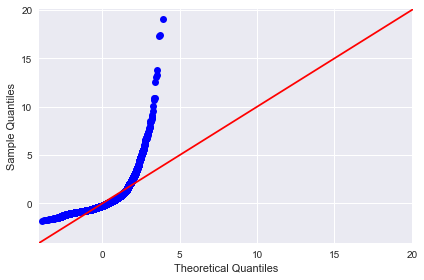

 kc_house_data - Regression Analysis and Diagnostics for Price~zipcode


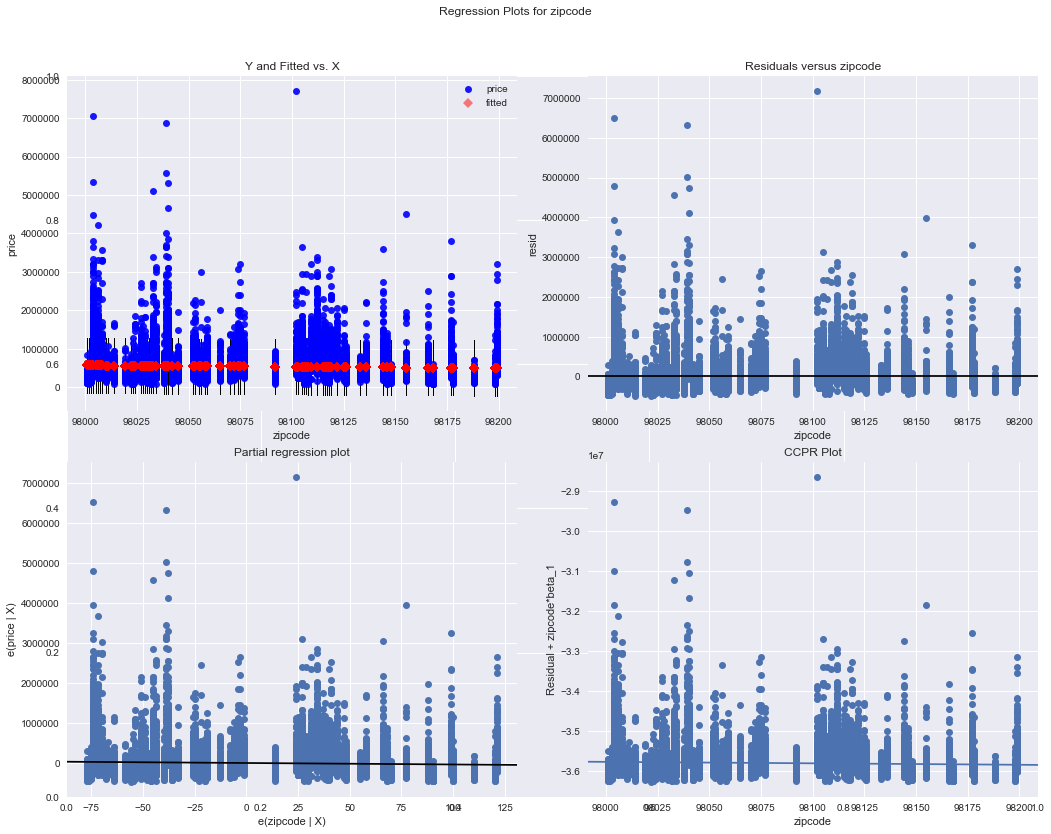

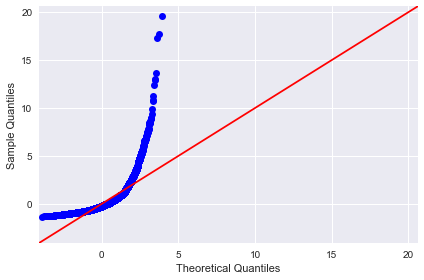

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_living15


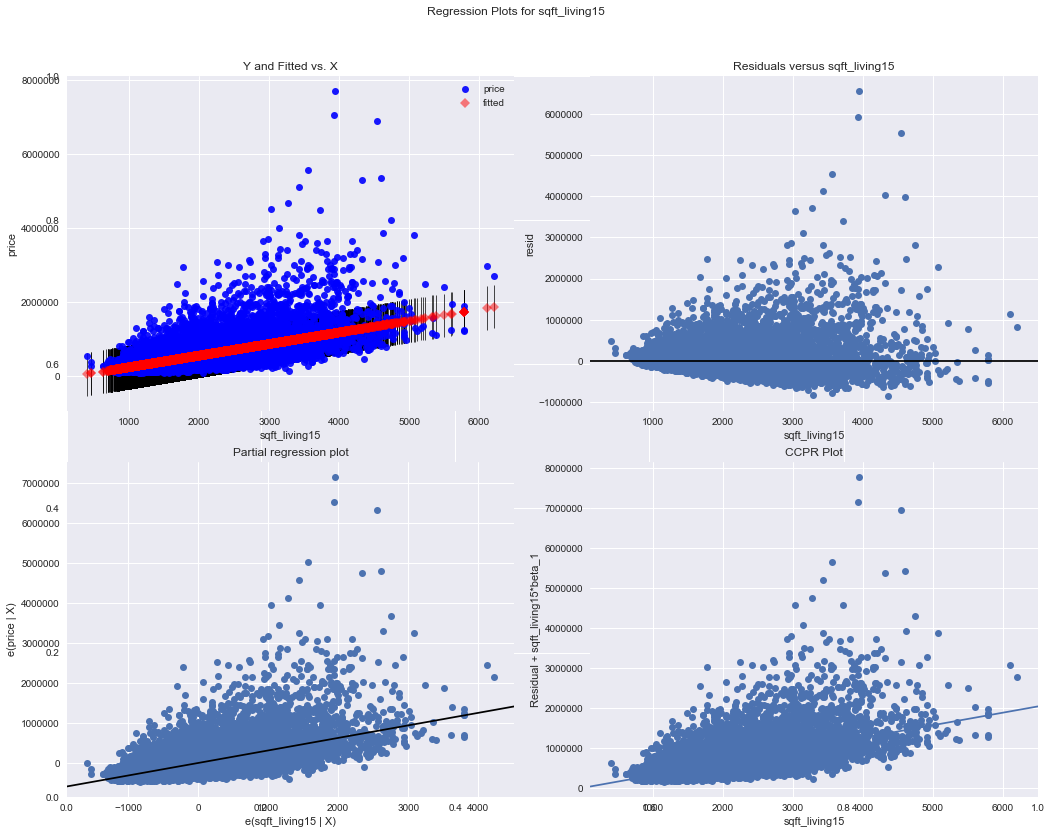

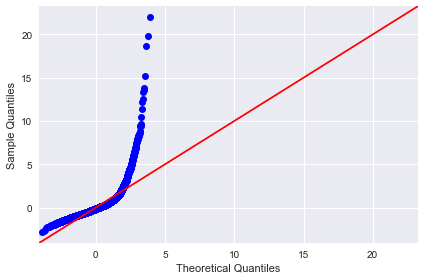

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_lot15


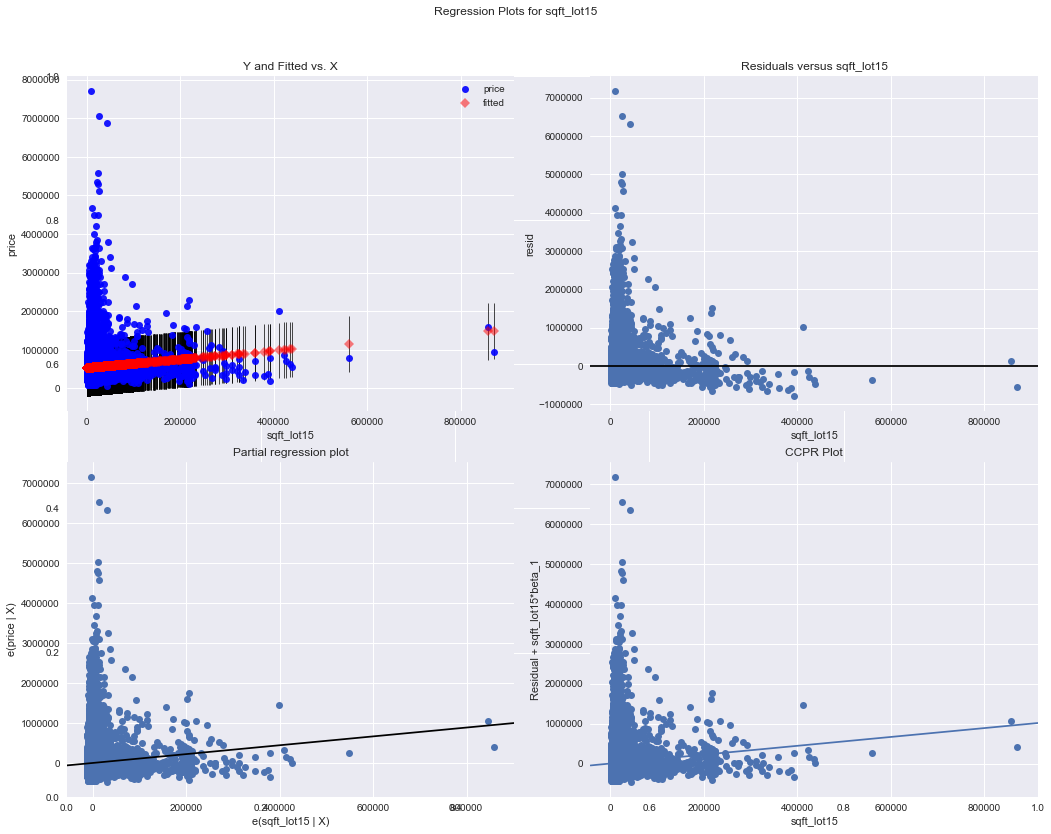

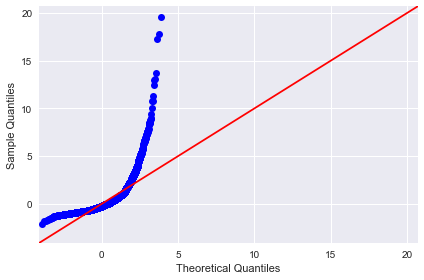

In [12]:
# Your code here
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
for idx, column in enumerate(y_columns):
    print (f" kc_house_data - Regression Analysis and Diagnostics for Price~{column}")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_house).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    

In [99]:
def drop_outliers(data, col, n_std):
    """
    Return a dataframe without outliers
    Parameters:
    data: dataframe
    col: column to check for outliers
    n_std: number of standard deviations to consider when dropping outliers
    """
    return data[np.abs(data[col]-data[col].mean())<=(n_std*data[col].std())]
df_house_normal = drop_outliers(df_house,'price',2)

In [100]:

f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+sqft_above'
model = smf.ols(formula=f, data=df_house_normal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2131.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:45:13   Log-Likelihood:            -2.7915e+05
No. Observations:               20770   AIC:                         5.583e+05
Df Residuals:                   20761   BIC:                         5.584e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.028e+05   1160.511    433.280      0.000    5.01e+05    5.05e+05
bedrooms      -1.985e+04   1482.503    -13.388      0.000   -2.28e+04   -1.69e+04
bathrooms     -5872.9461   1989.789     -2.952      0.003   -9773.087   -1972.805
sqft_living    1.679e+05   3388.102     49.552      0.000    1.61e+05    1.75e+05
sqft_lot       6802.0471   1703.312      3.993      0.000    3463.423    1.01e+04
floors         2.555e+04   1571.082     16.266      0.000    2.25e+04    2.86e+04
sqft_above    -4.932e+04   3004.467    -16.415      0.000   -5.52e+04   -4.34e+04
sqft_living15  6.328e+04   1954.107     32.383      0.000    5.94e+04    6.71e+04
sqft_lot15    -1.328e+04   1705.037     -7.789      0.000   -1.66e+04   -9939.176
==============================================================================
Omnibus:                     1598.093   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.694
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       3.813   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+sqft_above+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=df_house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2908.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:01:17   Log-Likelihood:            -2.9971e+05
No. Observations:               21613   AIC:                         5.994e+05
Df Residuals:                   21604   BIC:                         5.995e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.109e+04   8590.655      1.291      0.197   -5751.225    2.79e+04
bedrooms      -5.775e+04   2337.239    -24.709      0.000   -6.23e+04   -5.32e+04
bathrooms      1457.5546   3800.089      0.384      0.701   -5990.899    8906.009
sqft_living     313.4994      5.122     61.207      0.000     303.460     323.539
sqft_lot          0.0534      0.060      0.883      0.377      -0.065       0.172
floors          1.71e+04   4302.920      3.973      0.000    8661.995    2.55e+04
sqft_above      -51.2864      5.166     -9.927      0.000     -61.412     -41.160
sqft_living15    72.9224      4.001     18.227      0.000      65.081      80.764
sqft_lot15       -0.8581      0.092     -9.308      0.000      -1.039      -0.677
==============================================================================
Omnibus:                    15165.180   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           625757.531
Skew:                           2.881   Prob(JB):                         0.00
Kurtosis:                      28.723   Cond. No.                     2.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 kc_house_data - Regression Analysis and Diagnostics for Price~bedrooms


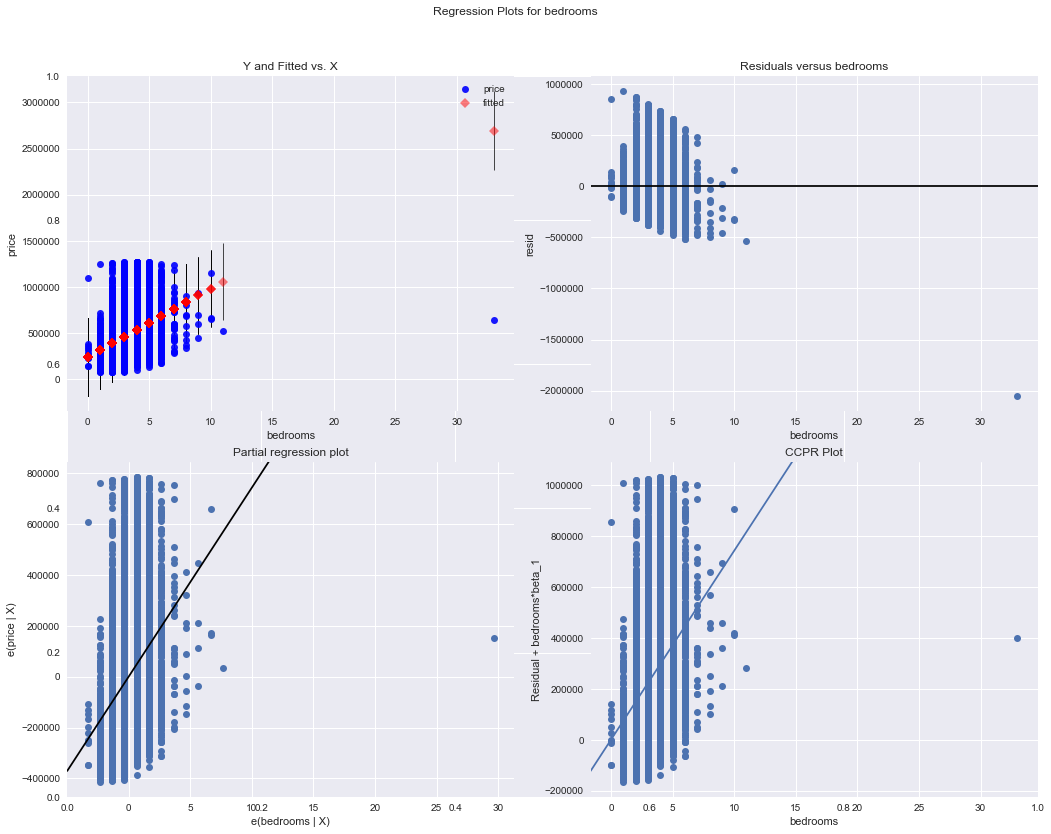

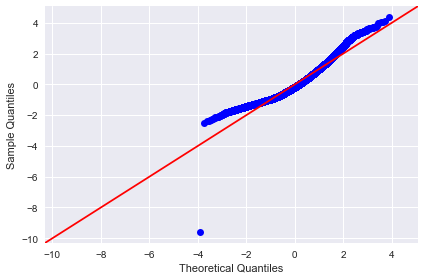

 kc_house_data - Regression Analysis and Diagnostics for Price~bathrooms


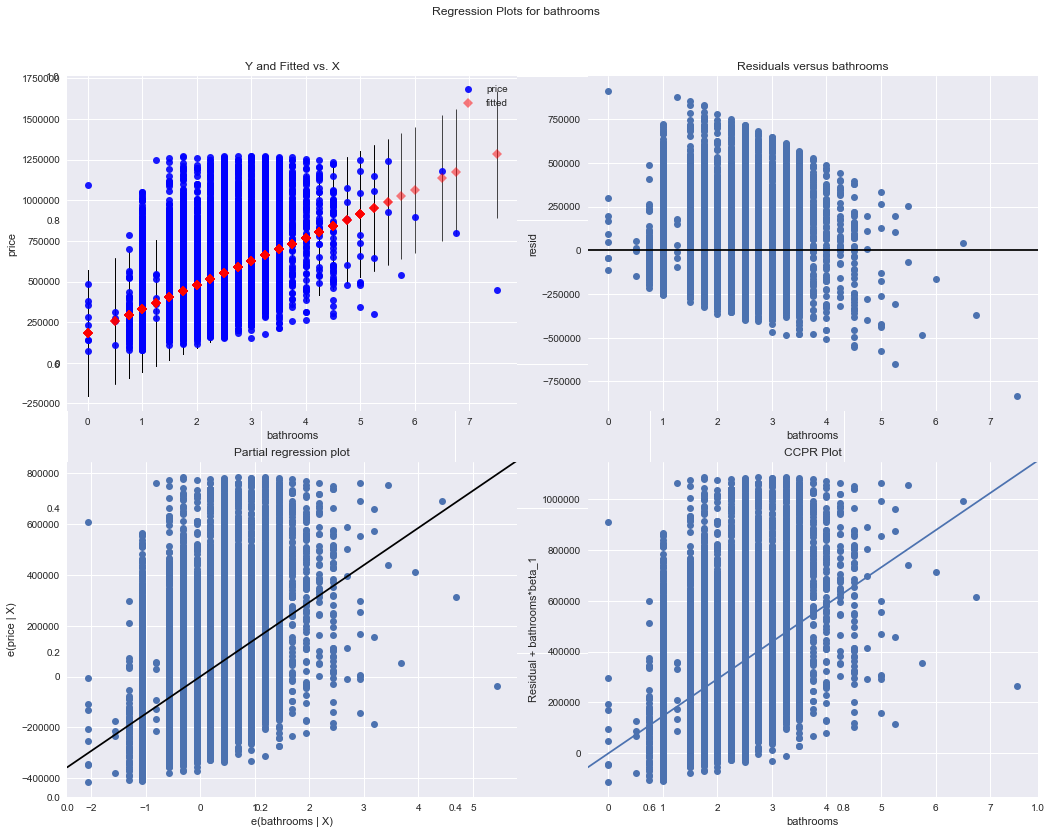

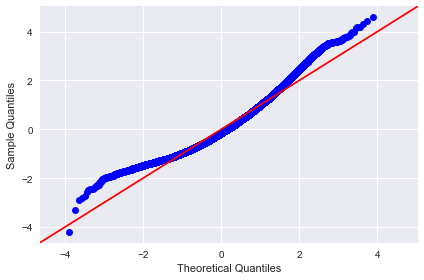

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_living


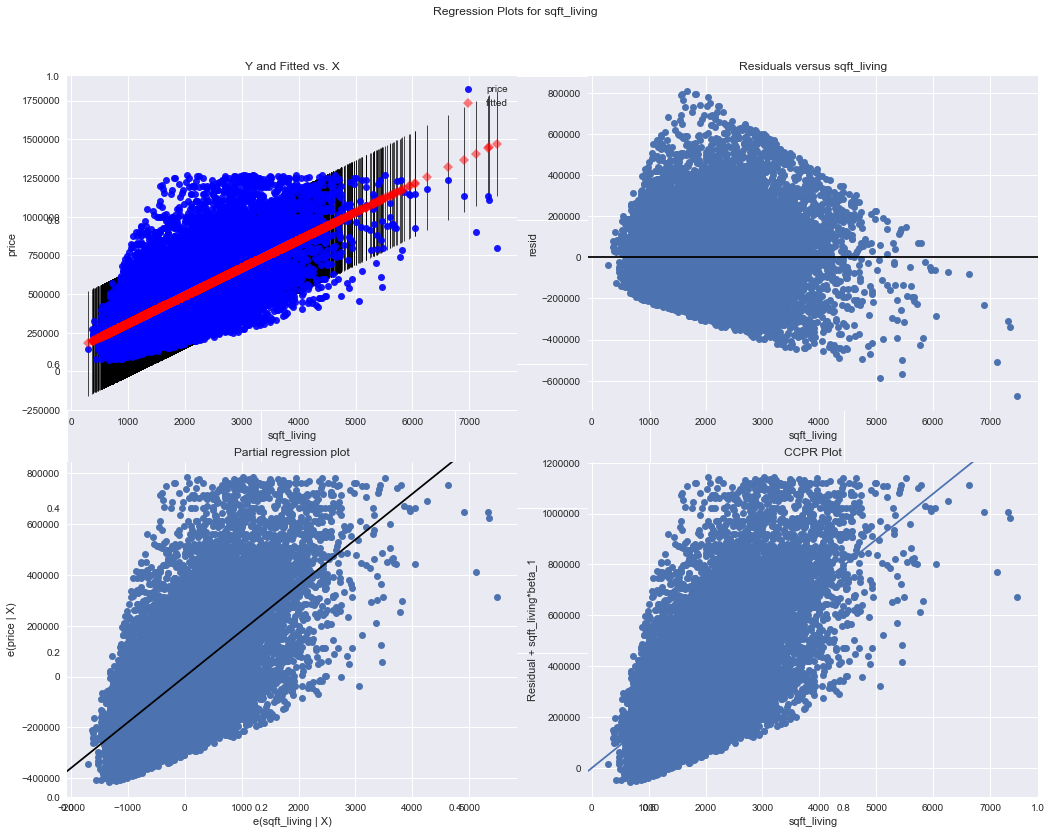

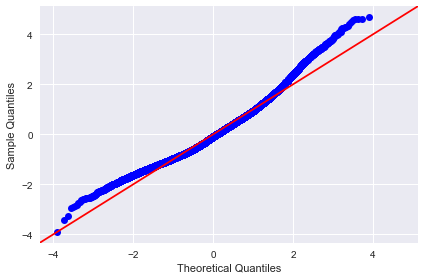

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_lot


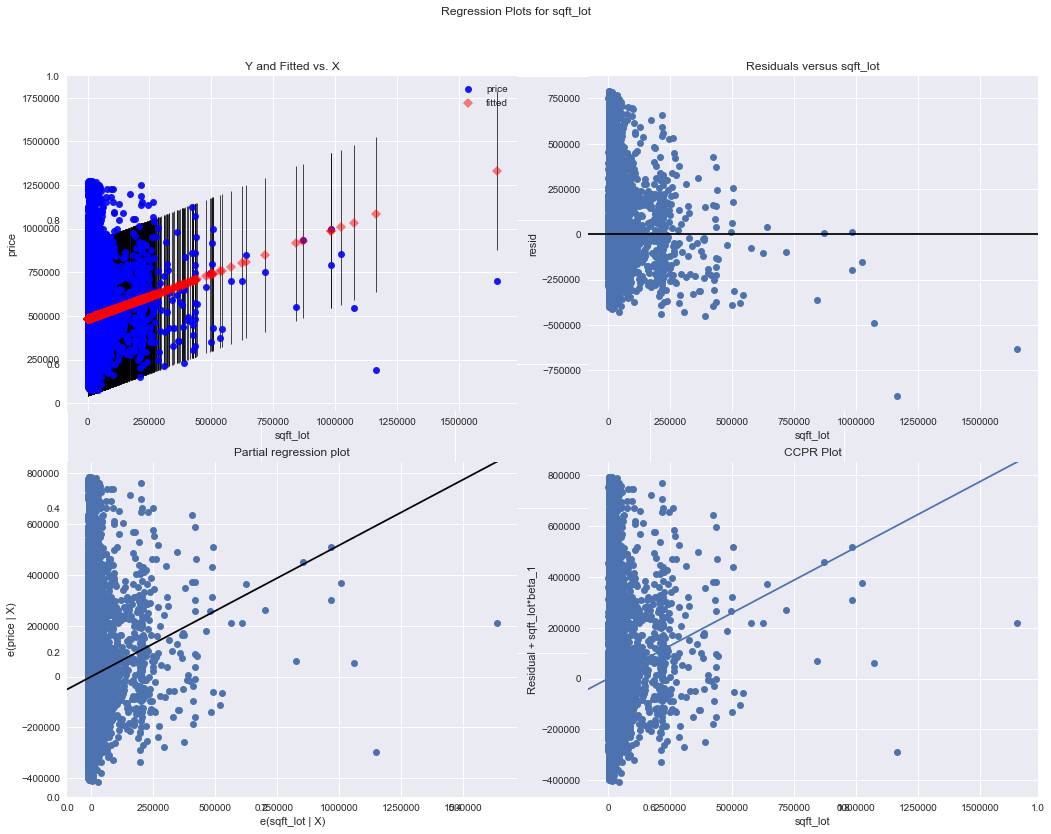

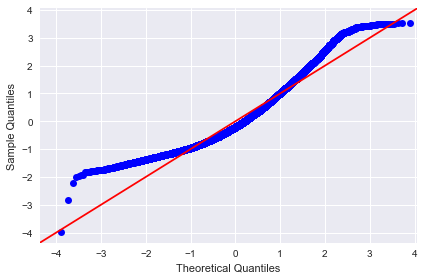

 kc_house_data - Regression Analysis and Diagnostics for Price~floors


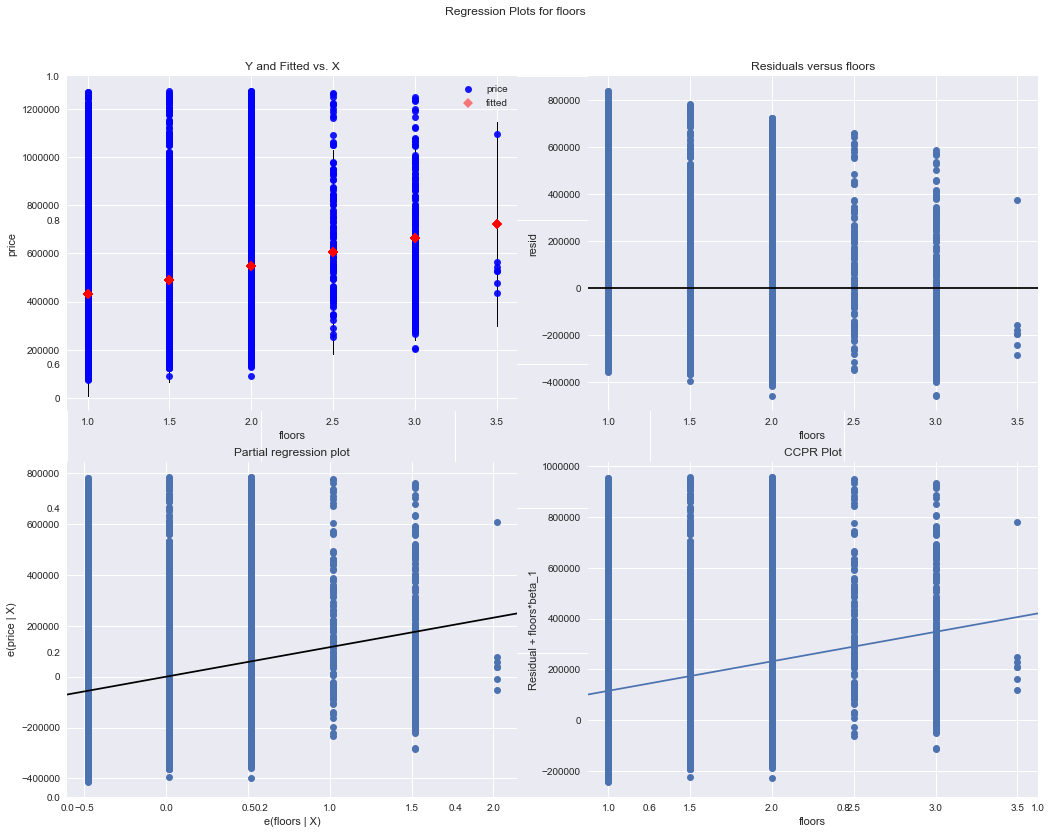

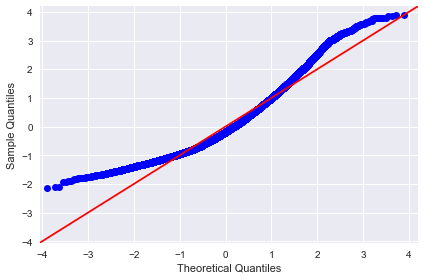

 kc_house_data - Regression Analysis and Diagnostics for Price~waterfront


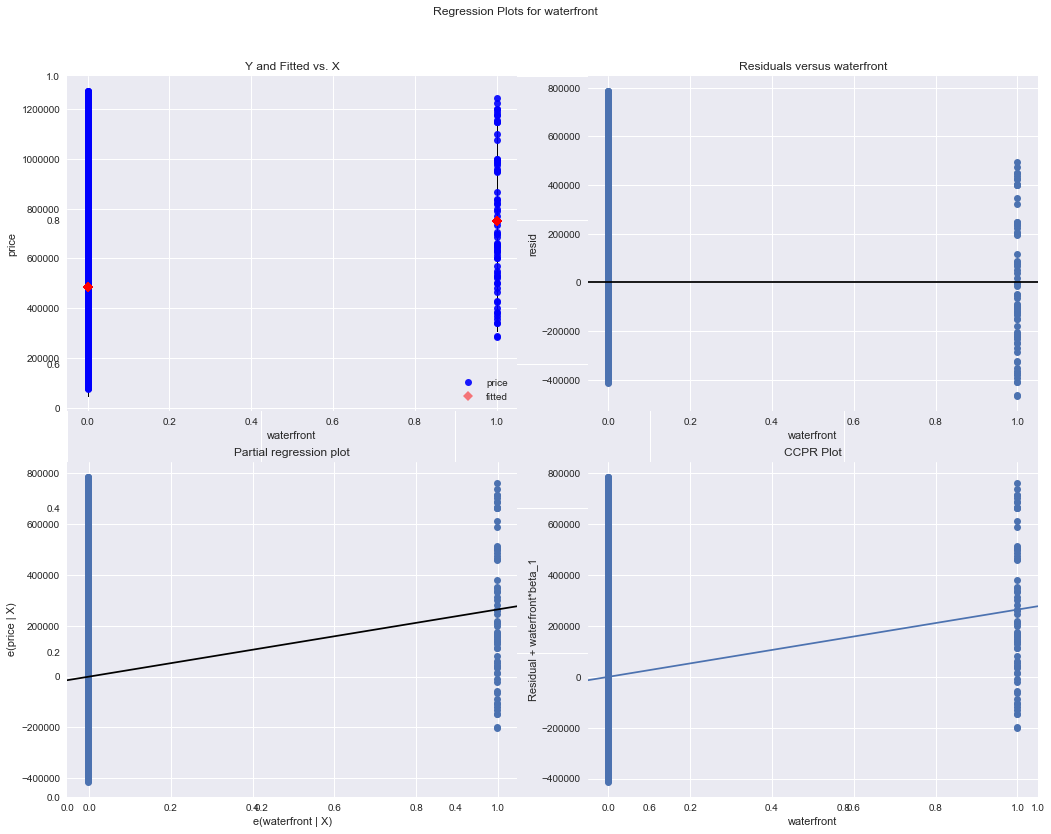

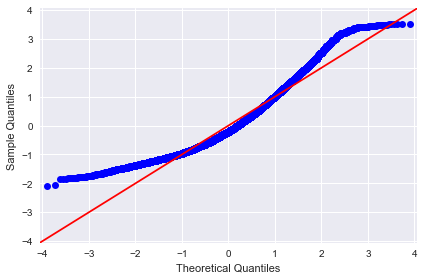

 kc_house_data - Regression Analysis and Diagnostics for Price~view


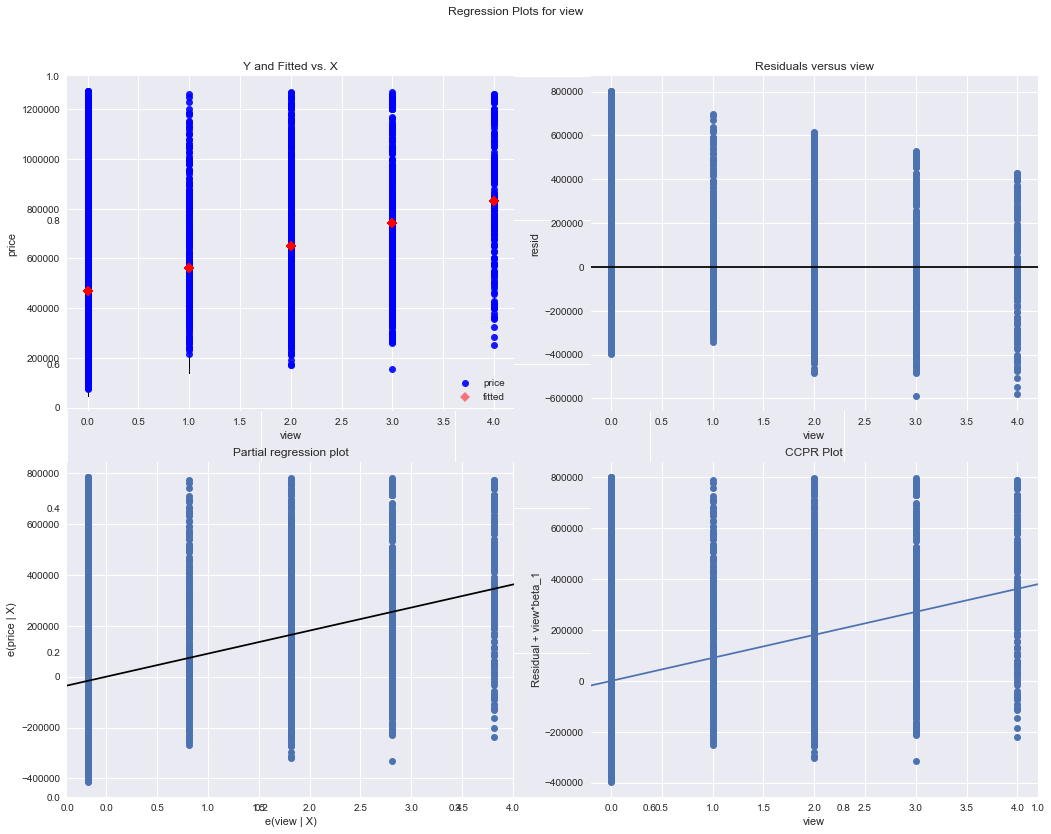

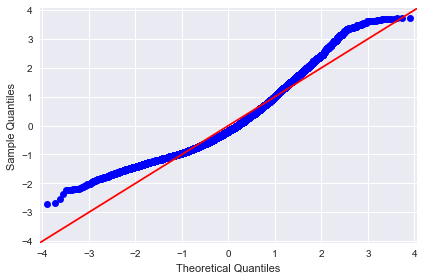

 kc_house_data - Regression Analysis and Diagnostics for Price~condition


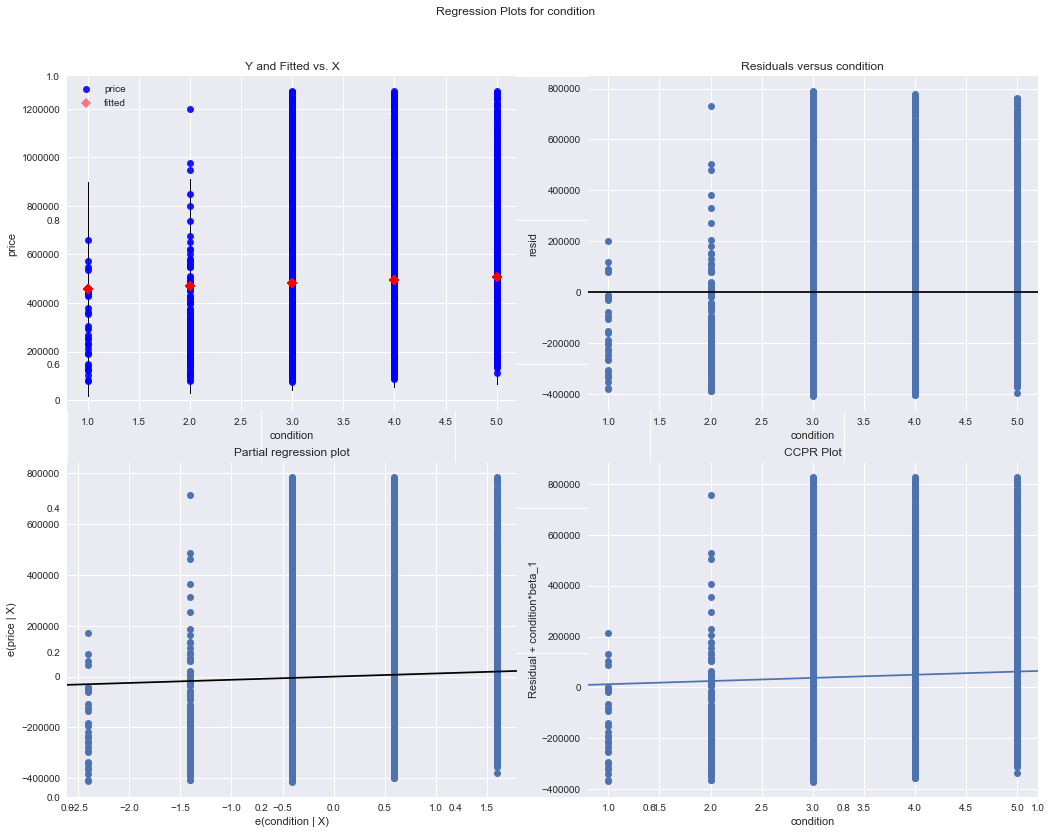

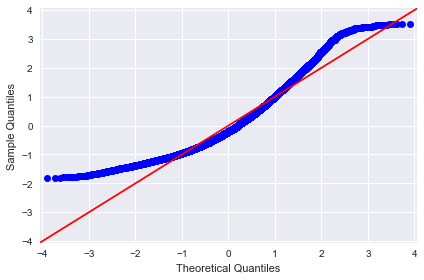

 kc_house_data - Regression Analysis and Diagnostics for Price~grade


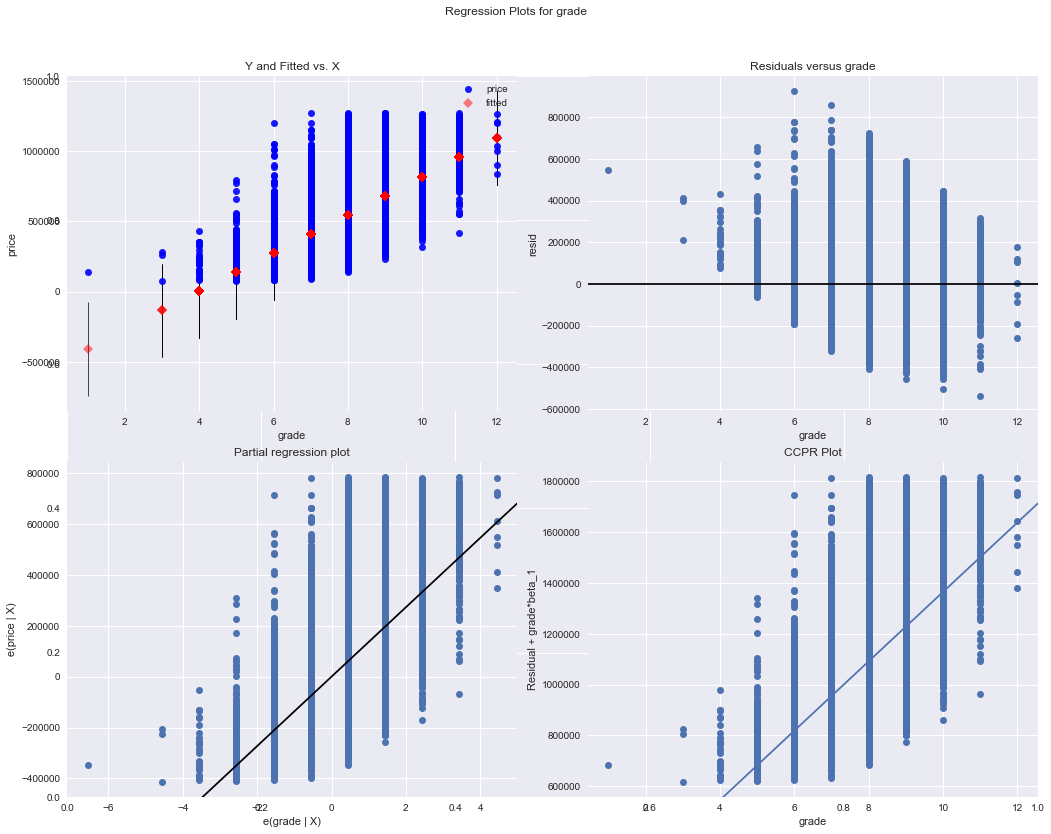

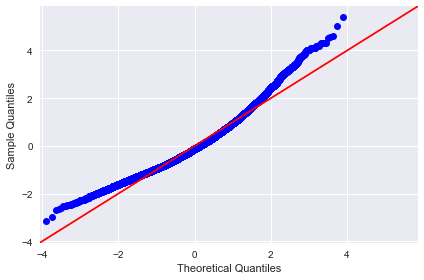

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_above


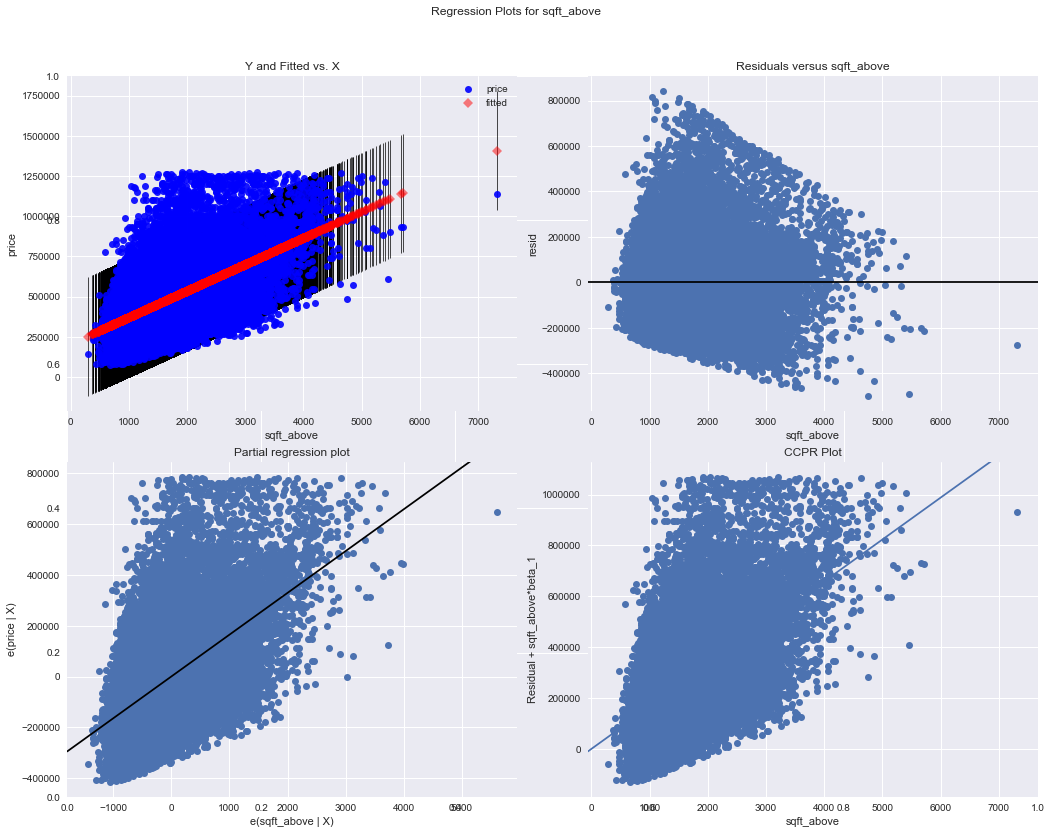

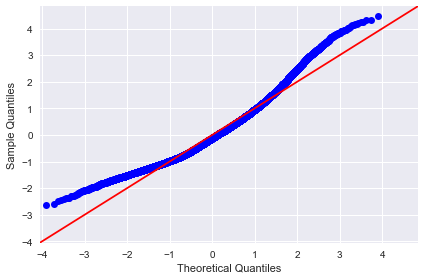

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_basement


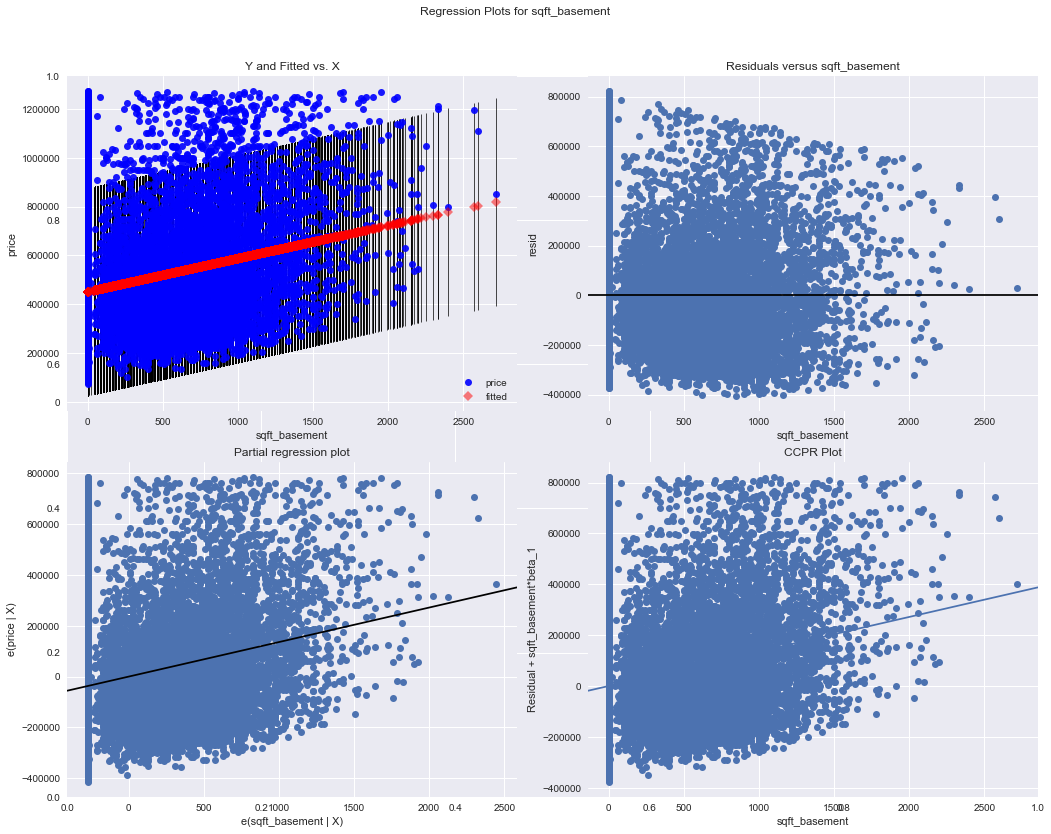

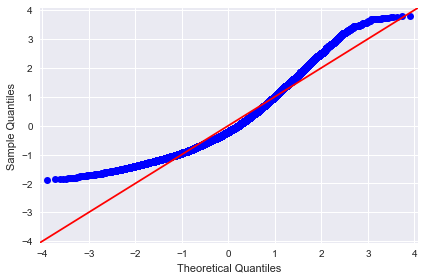

 kc_house_data - Regression Analysis and Diagnostics for Price~yr_built


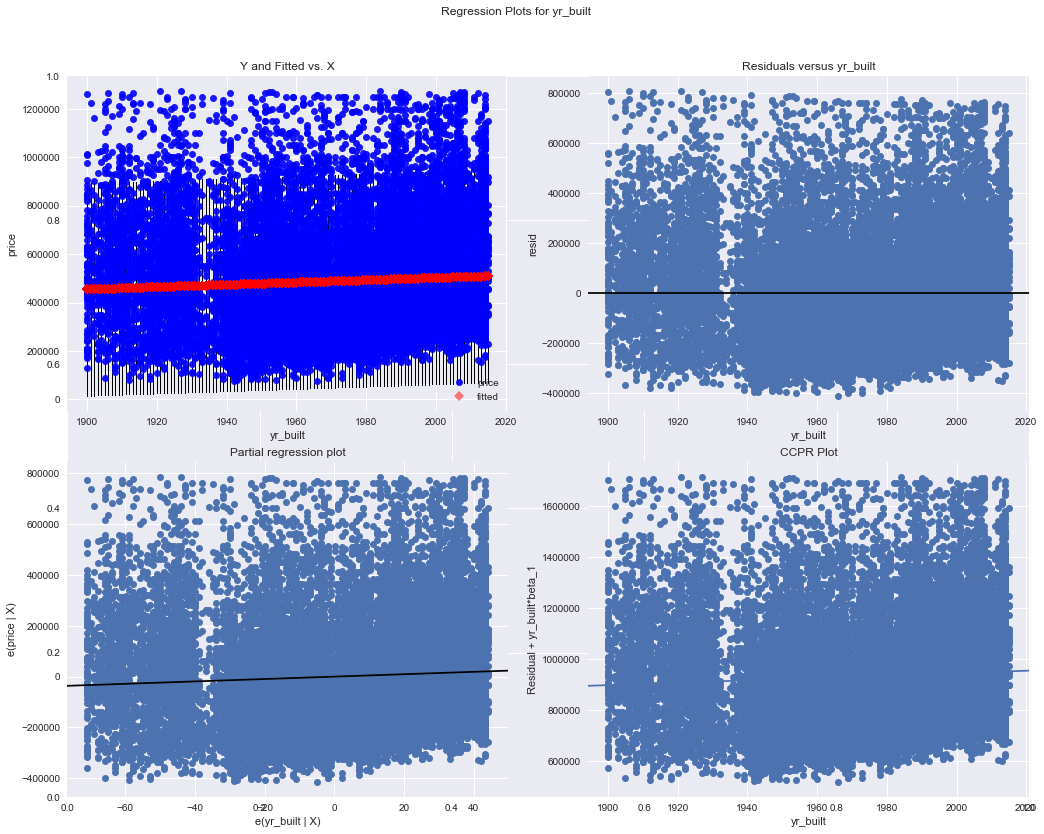

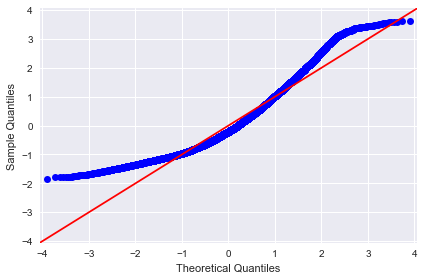

 kc_house_data - Regression Analysis and Diagnostics for Price~yr_renovated


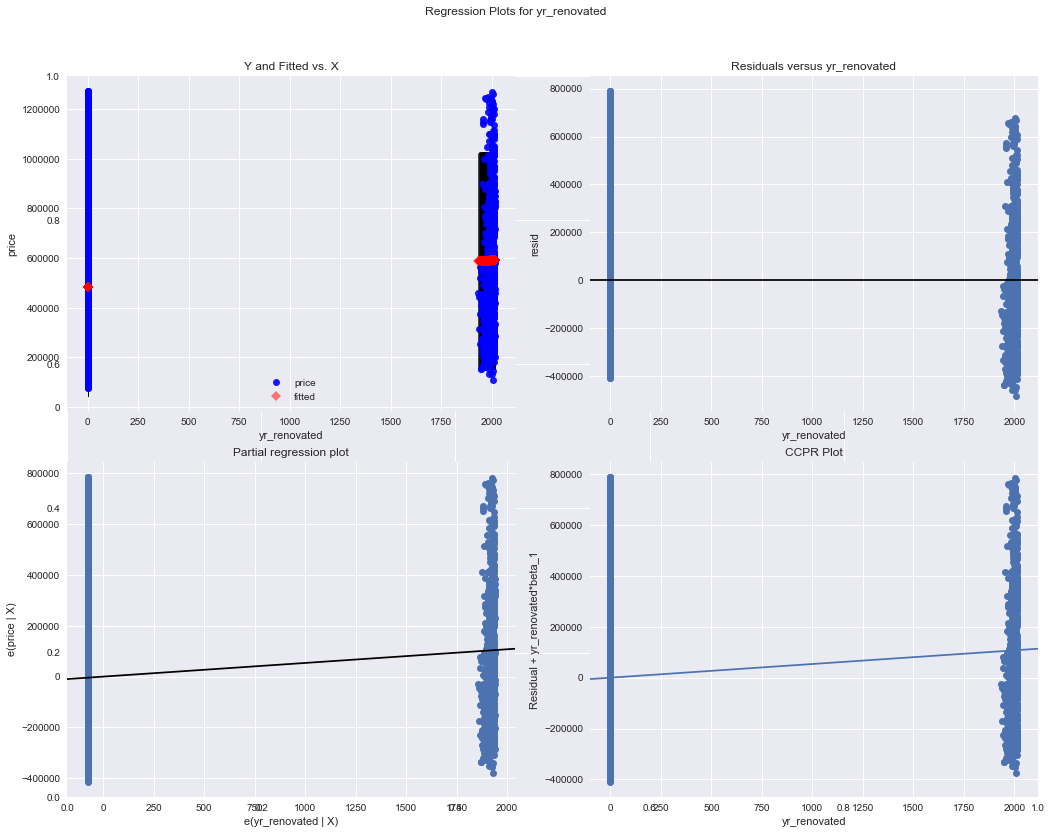

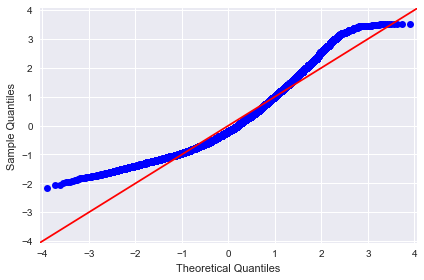

 kc_house_data - Regression Analysis and Diagnostics for Price~zipcode


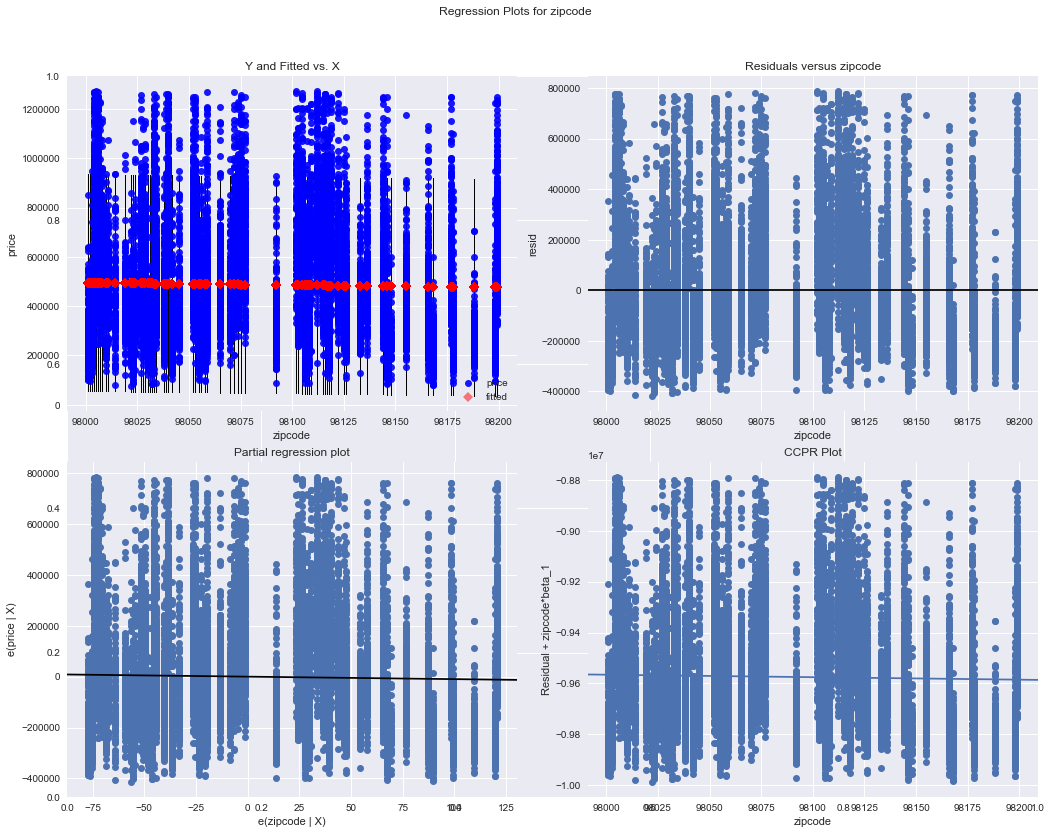

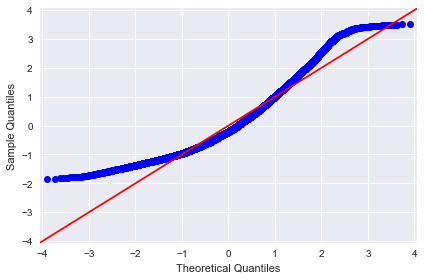

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_living15


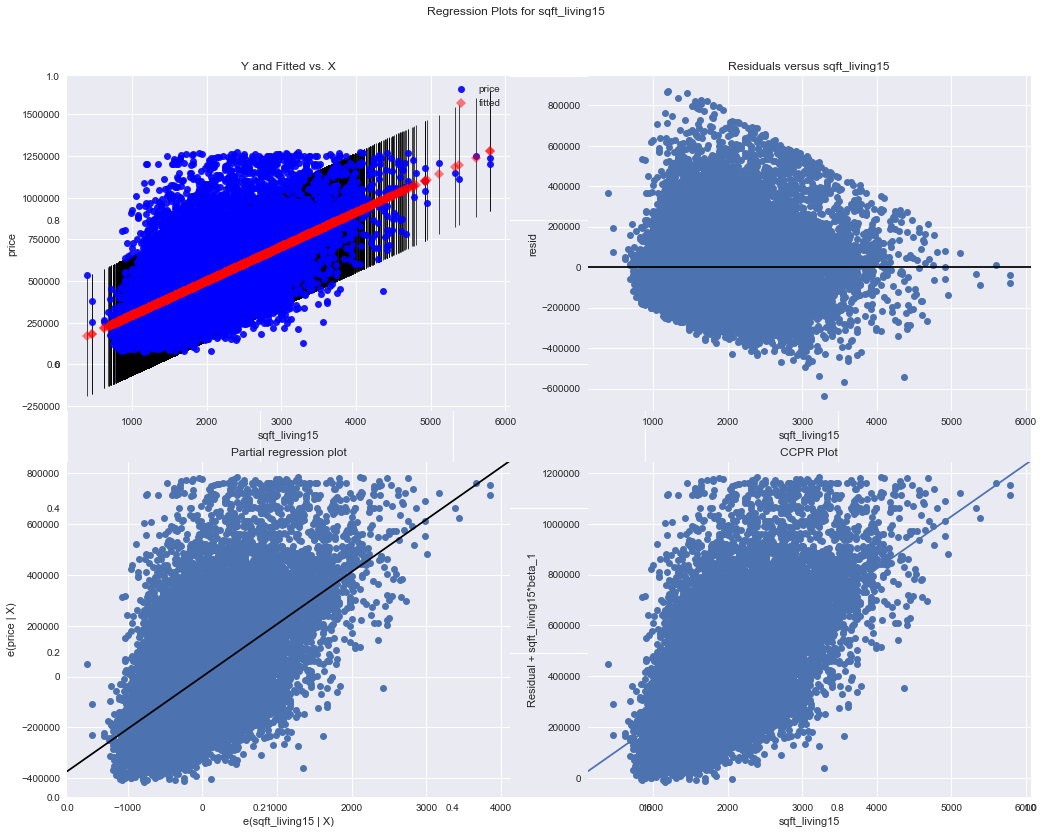

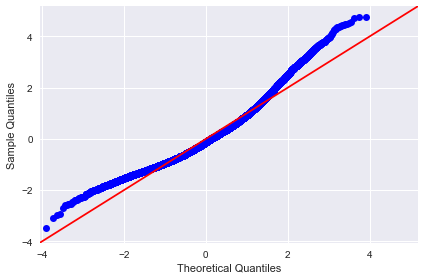

 kc_house_data - Regression Analysis and Diagnostics for Price~sqft_lot15


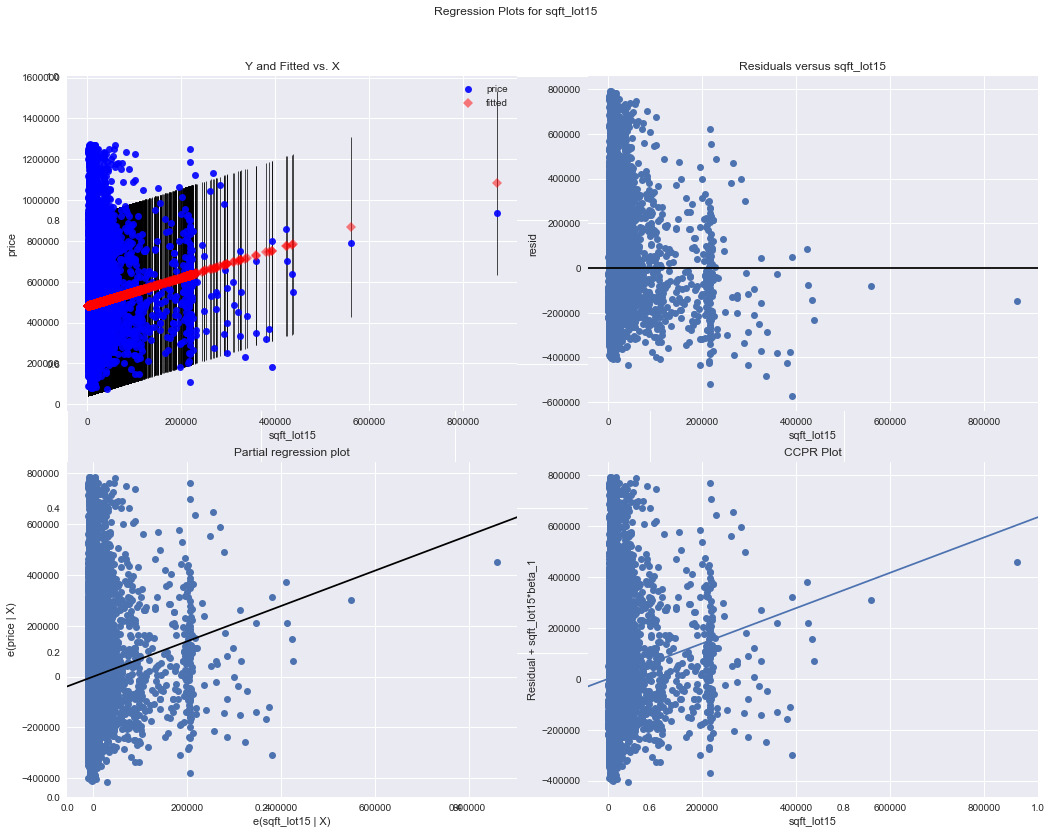

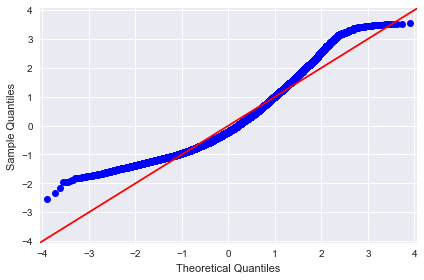

In [16]:
results = []
for idx, column in enumerate(y_columns):
    print (f" kc_house_data - Regression Analysis and Diagnostics for Price~{column}")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_house_normal).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

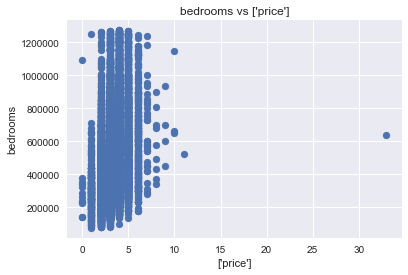

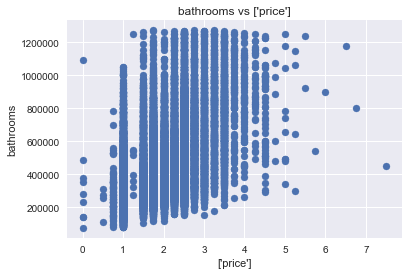

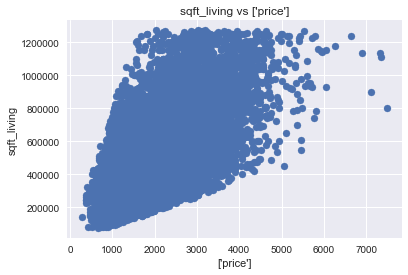

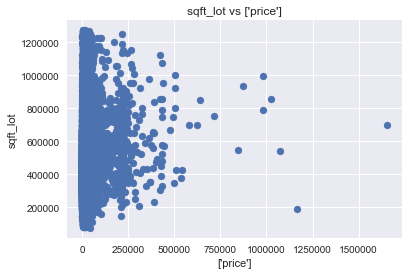

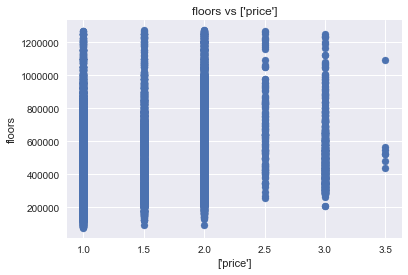

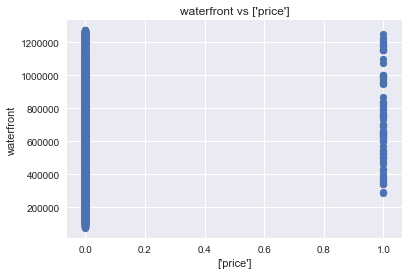

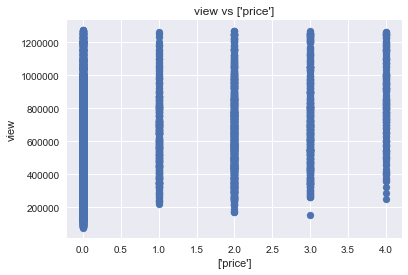

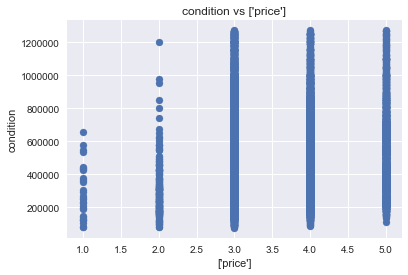

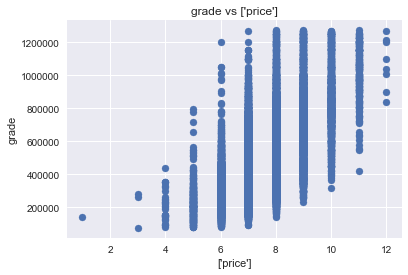

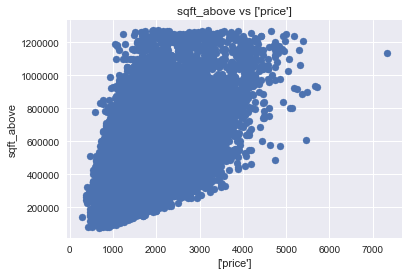

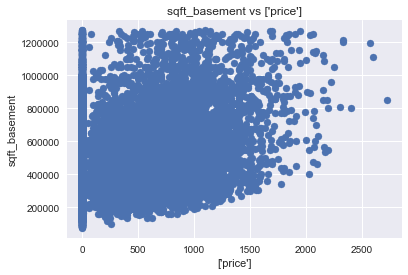

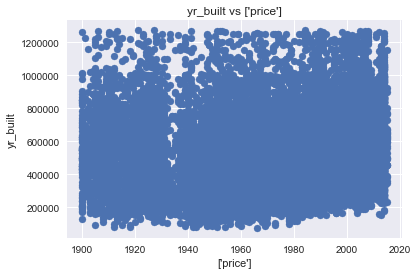

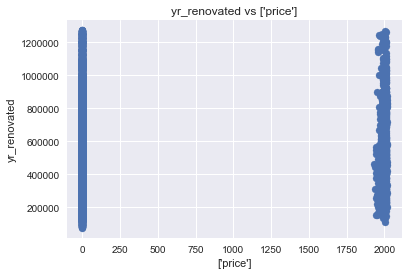

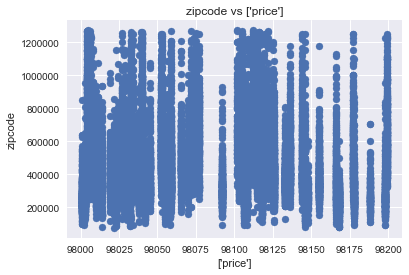

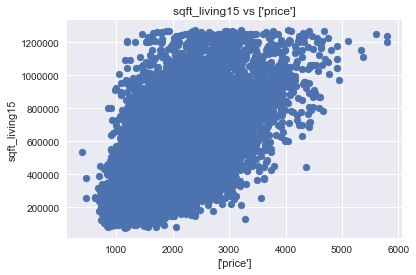

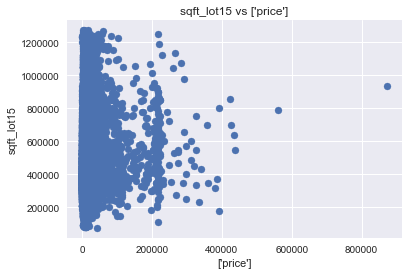

In [62]:
for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_house_normal[y_col], df_house_normal[x_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    plt.show()

price            323050.000
bedrooms              1.000
bathrooms             0.750
sqft_living        1123.000
sqft_lot           5648.000
floors                1.000
waterfront            0.000
view                  0.000
condition             1.000
grade                 1.000
sqft_above         1020.000
sqft_basement       560.000
yr_built             46.000
yr_renovated          0.000
zipcode              85.000
lat                   0.207
long                  0.203
sqft_living15       870.000
sqft_lot15         4983.000
dtype: float64


In [54]:
print(df_house < (Q1 - 1.5 * IQR)) |(df_house > (Q3 + 1.5 * IQR))

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
...      ...       ...        ...          ...       ...     ...         ...   
21608  False     False      False        False     False   False       False   
21609  False     False      False        False     False   False       False   
21610  False     False      False        False     False   False       False   
21611  False     False      False        False     False   False       False   
21612  False     False      False        False     False   False       False   

        view  condition  grade  sqft_ab

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [60]:
f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+sqft_above+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=boston_df_o).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:50:23   Log-Likelihood:            -2.5247e+05
No. Observations:               18707   AIC:                         5.050e+05
Df Residuals:                   18698   BIC:                         5.050e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.434e+04   6751.849     11.010      0.000    6.11e+04    8.76e+04
bedrooms      -2.805e+04   1945.960    -14.414      0.000   -3.19e+04   -2.42e+04
bathrooms     -1.614e+04   2986.338     -5.403      0.000    -2.2e+04   -1.03e+04
sqft_living     121.8002      2.352     51.788      0.000     117.190     126.410
sqft_lot          0.0872      0.197      0.443      0.658      -0.299       0.473
floors         4.108e+04   3338.213     12.307      0.000    3.45e+04    4.76e+04
sqft_above       33.5333      2.248     14.914      0.000      29.126      37.940
sqft_basement    88.2669      2.631     33.548      0.000      83.110      93.424
sqft_living15    89.7532      3.450     26.014      0.000      82.990      96.516
sqft_lot15       -1.8901      0.252     -7.491      0.000      -2.385      -1.396
==============================================================================
Omnibus:                     3477.041   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8715.899
Skew:                           1.030   Prob(JB):                         0.00
Kurtosis:                       5.635   Cond. No.                     2.83e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.78e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
non_normal = ['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' ,'floors','sqft_above','sqft_living15','sqft_lot15']
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in [non_normal]:
    df_house_normal[feat] = norm_feat(df_house[feat])
df_house.describe()


D:\Users\Trevor Mott\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04   
mean   4.580302e+09  5.400881e+05  7.966196e-16  4.750304e-15  2.164660e-16   
std    2.876566e+09  3.671272e+05  1.000000e+00  1.000000e+00  1.000000e+00   
min    1.000102e+06  7.500000e+04 -3.624320e+00 -2.745856e+00 -1.948846e+00   
25%    2.123049e+09  3.219500e+05 -3.987279e-01 -4.736105e-01 -7.108783e-01   
50%    3.904930e+09  4.500000e+05 -3.987279e-01  1.756026e-01 -1.849871e-01   
75%    7.308900e+09  6.450000e+05  6.764694e-01  5.002092e-01  5.118460e-01   
max    9.900000e+09  7.700000e+06  3.185719e+01  7.641553e+00  1.247778e+01   

           sqft_lot        floors     condition         grade    sqft_above  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  2.161300e+04   
mean   1.537582e-16 -7.674835e-16      3.409430      7.656873 -6.304894e-16   
std    1.000000e+00  1.000000e+00      0.650743      1.175459  1.000000e+00   
min   -3.521677e-01 -9.154058e-01      1.000000      1.000000 -1.809452e+00   
25%   -2.430431e-01 -9.154058e-01      3.000000      7.000000 -7.226147e-01   
50%   -1.808034e-01  1.053914e-02      3.000000      7.000000 -2.758039e-01   
75%   -1.066855e-01  9.364841e-01      4.000000      8.000000  5.091340e-01   
max    3.950342e+01  3.714319e+00      5.000000     13.000000  9.203831e+00   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258  98077.939805     47.560053   
std       442.575043     29.373411    401.679240     53.505026      0.138564   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15    sqft_lot15  
count  21613.000000   2.161300e+04  2.161300e+04  
mean    -122.213896   2.712246e-17 -1.529902e-16  
std        0.140828   1.000000e+00  1.000000e+00  
min     -122.519000  -2.316272e+00 -4.437949e-01  
25%     -122.328000  -7.244803e-01 -2.808528e-01  
50%     -122.230000  -2.138231e-01 -1.885593e-01  
75%     -122.125000   5.448676e-01 -9.835328e-02  
max     -121.315000   6.162097e+00  3.143957e+01

In [102]:
f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+sqft_above+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=df_house).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2908.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:45:52   Log-Likelihood:            -2.9971e+05
No. Observations:               21613   AIC:                         5.994e+05
Df Residuals:                   21604   BIC:                         5.995e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.401e+05   1733.226    311.609      0.000    5.37e+05    5.43e+05
bedrooms      -5.371e+04   2173.776    -24.709      0.000    -5.8e+04   -4.95e+04
bathrooms      1122.5548   2926.688      0.384      0.701   -4613.970    6859.080
sqft_living    2.879e+05   4704.236     61.207      0.000    2.79e+05    2.97e+05
sqft_lot       2209.9379   2503.003      0.883      0.377   -2696.133    7116.009
floors         9231.6694   2323.529      3.973      0.000    4677.381    1.38e+04
sqft_above    -4.247e+04   4278.060     -9.927      0.000   -5.09e+04   -3.41e+04
sqft_living15  4.998e+04   2742.133     18.227      0.000    4.46e+04    5.54e+04
sqft_lot15    -2.343e+04   2517.138     -9.308      0.000   -2.84e+04   -1.85e+04
==============================================================================
Omnibus:                    15165.180   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           625757.531
Skew:                           2.881   Prob(JB):                         0.00
Kurtosis:                      28.723   Cond. No.                         6.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+sqft_above+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=df_house_normal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2131.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:45:54   Log-Likelihood:            -2.7915e+05
No. Observations:               20770   AIC:                         5.583e+05
Df Residuals:                   20761   BIC:                         5.584e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.028e+05   1160.511    433.280      0.000    5.01e+05    5.05e+05
bedrooms      -1.985e+04   1482.503    -13.388      0.000   -2.28e+04   -1.69e+04
bathrooms     -5872.9461   1989.789     -2.952      0.003   -9773.087   -1972.805
sqft_living    1.679e+05   3388.102     49.552      0.000    1.61e+05    1.75e+05
sqft_lot       6802.0471   1703.312      3.993      0.000    3463.423    1.01e+04
floors         2.555e+04   1571.082     16.266      0.000    2.25e+04    2.86e+04
sqft_above    -4.932e+04   3004.467    -16.415      0.000   -5.52e+04   -4.34e+04
sqft_living15  6.328e+04   1954.107     32.383      0.000    5.94e+04    6.71e+04
sqft_lot15    -1.328e+04   1705.037     -7.789      0.000   -1.66e+04   -9939.176
==============================================================================
Omnibus:                     1598.093   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.694
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       3.813   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Your code here
feats = ['price' , 'bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' ,'floors','sqft_above','sqft_living15','sqft_lot15']
corr = df_house[feats].corr()
corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   

               sqft_above  sqft_living15  sqft_lot15  
price            0.605567       0.585379    0.082447  
bedrooms         0.477600       0.391638    0.029244  
bathrooms        0.685342       0.568634    0.087175  
sqft_living      0.876597       0.756420    0.183286  
sqft_lot         0.183512       0.144608    0.718557  
floors           0.523885       0.279885   -0.011269  
sqft_above       1.000000       0.731870    0.194050  
sqft_living15    0.731870       1.000000    0.183192  
sqft_lot15       0.194050       0.183192    1.000000

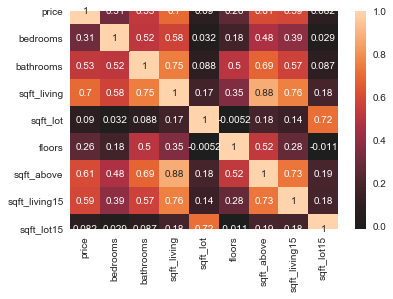

In [109]:

sns.heatmap(corr, center=0, annot=True);

In [146]:
outcome = 'price'
x_cols = list(df_house_normal.columns)
x_cols.remove(outcome)

In [147]:
train, test = train_test_split(df_house_normal)

In [148]:
print(len(train), len(test))
train.head()

15577 5193


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5649   6820100010   415000.0  0.676469  -0.149004    -0.304755 -0.293018   
1003   2826049282   530000.0 -0.398728   0.500209    -0.163211 -0.190557   
18225   259801140   451000.0  0.676469  -0.473610    -0.435412 -0.176409   
12007  3275300270   250000.0 -0.398728  -0.473610    -1.023364 -0.113639   
15431  7855300460  1000000.0 -0.398728   0.824816     0.315862 -0.149853   

         floors  condition  grade  sqft_above  sqft_basement  yr_built  \
5649  -0.915406          4      7   -0.952058            800      1923   
1003   0.936484          3      8    0.171007              0      2005   
18225 -0.915406          3      7   -0.553551            350      1966   
12007 -0.915406          4      7   -0.782995              0      1983   
15431 -0.915406          4      9   -0.142968            700      1971   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
5649              0    98115  47.6833 -122.312      -0.432676   -0.328428  
1003              0    98125  47.7191 -122.309      -0.082511   -0.201524  
18225             0    98008  47.6286 -122.118      -0.447266   -0.203575  
12007             0    98003  47.2598 -122.311      -1.030875   -0.108718  
15431             0    98006  47.5648 -122.156       1.245197   -0.139629

In [149]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2227.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:30:41   Log-Likelihood:            -2.0473e+05
No. Observations:               15577   AIC:                         4.095e+05
Df Residuals:                   15560   BIC:                         4.096e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.193e+07      2e+06     -5.958      0.000   -1.59e+07   -8.01e+06
id             2.848e-07   3.49e-07      0.816      0.415   -3.99e-07    9.69e-07
bedrooms      -1.491e+04   1356.009    -10.997      0.000   -1.76e+04   -1.23e+04
bathrooms      2.029e+04   1854.762     10.938      0.000    1.67e+04    2.39e+04
sqft_living     2.12e+06   3.51e+05      6.044      0.000    1.43e+06    2.81e+06
sqft_lot       9467.2471   1380.614      6.857      0.000    6761.082    1.22e+04
floors         1.882e+04   1432.587     13.134      0.000     1.6e+04    2.16e+04
condition      2.825e+04   1714.862     16.471      0.000    2.49e+04    3.16e+04
grade          7.889e+04   1589.362     49.639      0.000    7.58e+04     8.2e+04
sqft_above     -1.85e+06   3.16e+05     -5.852      0.000   -2.47e+06   -1.23e+06
sqft_basement -2220.4029    382.302     -5.808      0.000   -2969.759   -1471.047
yr_built      -1998.9145     53.590    -37.300      0.000   -2103.957   -1893.872
yr_renovated     21.7130      2.768      7.843      0.000      16.287      27.139
zipcode        -182.4682     23.880     -7.641      0.000    -229.276    -135.660
lat            5.283e+05   7603.277     69.486      0.000    5.13e+05    5.43e+05
long           -7.44e+04   9587.276     -7.760      0.000   -9.32e+04   -5.56e+04
sqft_living15  4.358e+04   1788.277     24.372      0.000    4.01e+04    4.71e+04
sqft_lot15    -3064.3758   1427.350     -2.147      0.032   -5862.148    -266.604
==============================================================================
Omnibus:                     1912.384   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.881
Skew:                           0.756   Prob(JB):                         0.00
Kurtosis:                       5.002   Cond. No.                     1.86e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [150]:

# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

18 16
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


0                  coef    std err          t  P>|t|     [0.025     0.975]
                                                                          
Intercept    -1.193e+07      2e+06     -5.958  0.000  -1.59e+07  -8.01e+06
id            2.848e-07   3.49e-07      0.816  0.415  -3.99e-07   9.69e-07
bedrooms     -1.491e+04   1356.009    -10.997  0.000  -1.76e+04  -1.23e+04
bathrooms     2.029e+04   1854.762     10.938  0.000   1.67e+04   2.39e+04
sqft_living    2.12e+06   3.51e+05      6.044  0.000   1.43e+06   2.81e+06

In [151]:

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2375.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:31:05   Log-Likelihood:            -2.0473e+05
No. Observations:               15577   AIC:                         4.095e+05
Df Residuals:                   15561   BIC:                         4.096e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.191e+07      2e+06     -5.945      0.000   -1.58e+07   -7.98e+06
bedrooms      -1.492e+04   1355.984    -11.001      0.000   -1.76e+04   -1.23e+04
bathrooms       2.03e+04   1854.658     10.946      0.000    1.67e+04    2.39e+04
sqft_living    2.115e+06   3.51e+05      6.031      0.000    1.43e+06     2.8e+06
sqft_lot       9413.2343   1379.011      6.826      0.000    6710.211    1.21e+04
floors         1.882e+04   1432.553     13.139      0.000     1.6e+04    2.16e+04
condition      2.823e+04   1714.698     16.462      0.000    2.49e+04    3.16e+04
grade          7.893e+04   1588.571     49.689      0.000    7.58e+04     8.2e+04
sqft_above    -1.846e+06   3.16e+05     -5.839      0.000   -2.47e+06   -1.23e+06
sqft_basement -2215.0899    382.242     -5.795      0.000   -2964.329   -1465.851
yr_built      -1999.6308     53.582    -37.319      0.000   -2104.658   -1894.604
yr_renovated     21.6799      2.768      7.832      0.000      16.254      27.106
zipcode        -182.2858     23.879     -7.634      0.000    -229.091    -135.480
lat            5.282e+05   7602.131     69.483      0.000    5.13e+05    5.43e+05
long          -7.407e+04   9578.840     -7.733      0.000   -9.29e+04   -5.53e+04
sqft_living15  4.358e+04   1788.254     24.371      0.000    4.01e+04    4.71e+04
sqft_lot15    -3151.7432   1423.312     -2.214      0.027   -5941.601    -361.885
==============================================================================
Omnibus:                     1910.397   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.865
Skew:                           0.756   Prob(JB):                         0.00
Kurtosis:                       5.000   Cond. No.                     3.08e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [152]:

# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

17 16
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


0                  coef    std err          t  P>|t|     [0.025     0.975]
                                                                          
Intercept    -1.191e+07      2e+06     -5.945    0.0  -1.58e+07  -7.98e+06
bedrooms     -1.492e+04   1355.984    -11.001    0.0  -1.76e+04  -1.23e+04
bathrooms      2.03e+04   1854.658     10.946    0.0   1.67e+04   2.39e+04
sqft_living   2.115e+06   3.51e+05      6.031    0.0   1.43e+06    2.8e+06
sqft_lot      9413.2343   1379.011      6.826    0.0   6710.211   1.21e+04

In [153]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2375.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:31:17   Log-Likelihood:            -2.0473e+05
No. Observations:               15577   AIC:                         4.095e+05
Df Residuals:                   15561   BIC:                         4.096e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.191e+07      2e+06     -5.945      0.000   -1.58e+07   -7.98e+06
bedrooms      -1.492e+04   1355.984    -11.001      0.000   -1.76e+04   -1.23e+04
bathrooms       2.03e+04   1854.658     10.946      0.000    1.67e+04    2.39e+04
sqft_living    2.115e+06   3.51e+05      6.031      0.000    1.43e+06     2.8e+06
sqft_lot       9413.2343   1379.011      6.826      0.000    6710.211    1.21e+04
floors         1.882e+04   1432.553     13.139      0.000     1.6e+04    2.16e+04
condition      2.823e+04   1714.698     16.462      0.000    2.49e+04    3.16e+04
grade          7.893e+04   1588.571     49.689      0.000    7.58e+04     8.2e+04
sqft_above    -1.846e+06   3.16e+05     -5.839      0.000   -2.47e+06   -1.23e+06
sqft_basement -2215.0899    382.242     -5.795      0.000   -2964.329   -1465.851
yr_built      -1999.6308     53.582    -37.319      0.000   -2104.658   -1894.604
yr_renovated     21.6799      2.768      7.832      0.000      16.254      27.106
zipcode        -182.2858     23.879     -7.634      0.000    -229.091    -135.480
lat            5.282e+05   7602.131     69.483      0.000    5.13e+05    5.43e+05
long          -7.407e+04   9578.840     -7.733      0.000   -9.29e+04   -5.53e+04
sqft_living15  4.358e+04   1788.254     24.371      0.000    4.01e+04    4.71e+04
sqft_lot15    -3151.7432   1423.312     -2.214      0.027   -5941.601    -361.885
==============================================================================
Omnibus:                     1910.397   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.865
Skew:                           0.756   Prob(JB):                         0.00
Kurtosis:                       5.000   Cond. No.                     3.08e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
X = df_house_normal[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6575311777516164),
 ('bathrooms', 3.0776777221183798),
 ('sqft_living', 34403767.010899894),
 ('sqft_lot', 2.0509884768199242),
 ('floors', 2.0652957175193656),
 ('condition', 1.242137550112903),
 ('grade', 2.930092933960579),
 ('sqft_above', 29790306.069625843),
 ('sqft_basement', 13152535.315434907),
 ('yr_built', 2.483029655762823),
 ('yr_renovated', 1.132803235731968),
 ('zipcode', 1.646501934814016),
 ('lat', 1.1727309001206832),
 ('long', 1.8380896520703536),
 ('sqft_living15', 2.8026821802652626),
 ('sqft_lot15', 2.0888781360092215)]

In [155]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

16 13


In [156]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2524.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:31:35   Log-Likelihood:            -2.0517e+05
No. Observations:               15577   AIC:                         4.104e+05
Df Residuals:                   15563   BIC:                         4.105e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.597e+07   2.14e+06     -7.460      0.000   -2.02e+07   -1.18e+07
bedrooms        813.0946   1284.752      0.633      0.527   -1705.169    3331.359
bathrooms      4.264e+04   1733.336     24.600      0.000    3.92e+04     4.6e+04
sqft_lot       1.112e+04   1416.629      7.850      0.000    8343.977    1.39e+04
floors         1.556e+04   1307.748     11.902      0.000     1.3e+04    1.81e+04
condition      3.018e+04   1757.618     17.172      0.000    2.67e+04    3.36e+04
grade          9.398e+04   1528.398     61.492      0.000     9.1e+04     9.7e+04
yr_built      -2223.5709     54.583    -40.737      0.000   -2330.560   -2116.582
yr_renovated     23.1199      2.847      8.121      0.000      17.539      28.701
zipcode        -131.0259     24.490     -5.350      0.000    -179.029     -83.023
lat            5.246e+05   7768.914     67.522      0.000    5.09e+05     5.4e+05
long          -6.492e+04   9639.782     -6.734      0.000   -8.38e+04    -4.6e+04
sqft_living15  6.452e+04   1652.041     39.055      0.000    6.13e+04    6.78e+04
sqft_lot15     -724.0424   1461.738     -0.495      0.620   -3589.219    2141.135
==============================================================================
Omnibus:                     2048.803   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4298.410
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                       5.002   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

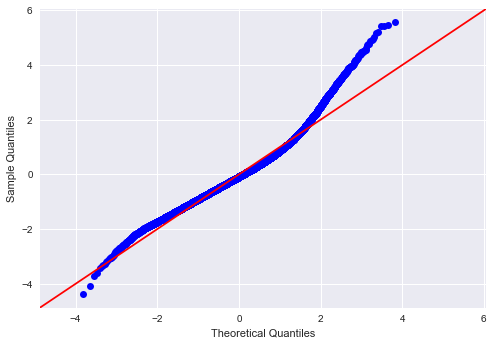

In [157]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

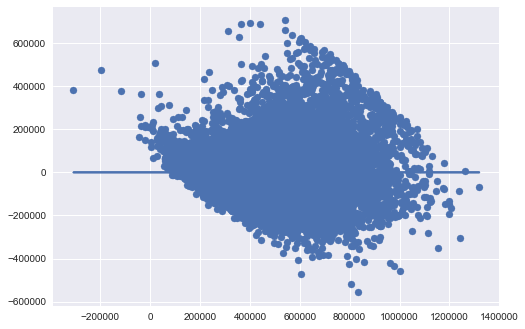

In [158]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

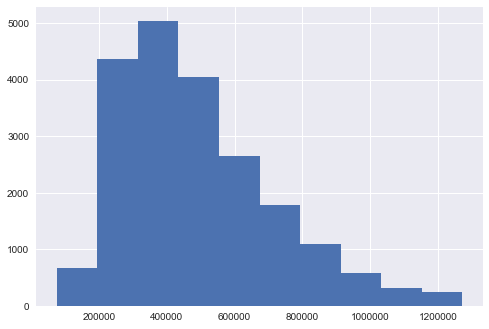

In [159]:
df_house_normal.price.hist()

In [160]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_house_normal.price.quantile(q=q)))

0.8 percentile: 664590.0000000003
0.81 percentile: 675000.0
0.82 percentile: 688952.9599999998
0.83 percentile: 700000.0
0.84 percentile: 715000.0
0.85 percentile: 725685.8999999994
0.86 percentile: 740000.0
0.87 percentile: 755000.0
0.88 percentile: 772000.0
0.89 percentile: 788205.0
0.9 percentile: 805000.0
0.91 percentile: 825000.0
0.92 percentile: 849000.0
0.93 percentile: 870000.0
0.94 percentile: 898000.0
0.95 percentile: 925000.0
0.96 percentile: 963992.4
0.97 percentile: 1000000.0
0.98 percentile: 1080000.0
0.99 percentile: 1175000.0


In [161]:
orig_tot = len(df_house_normal)
df_house_normal = df_house_normal[df_house_normal.price < 1156479] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_house_normal))/orig_tot)
df_house_normal.price = df_house_normal.price.map(np.log) # Applying a log transformation
train, test = train_test_split(df_house_normal)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.011458834857968224


D:\Users\Trevor Mott\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2651.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:32:59   Log-Likelihood:                -540.06
No. Observations:               15399   AIC:                             1108.
Df Residuals:                   15385   BIC:                             1215.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -26.9554      4.228     -6.375      0.000     -35.243     -18.668
bedrooms          0.0098      0.002      4.049      0.000       0.005       0.015
bathrooms         0.0923      0.003     26.938      0.000       0.086       0.099
sqft_lot          0.0319      0.003     10.663      0.000       0.026       0.038
floors            0.0367      0.003     14.144      0.000       0.032       0.042
condition         0.0709      0.003     20.476      0.000       0.064       0.078
grade             0.1747      0.003     57.140      0.000       0.169       0.181
yr_built         -0.0038      0.000    -34.930      0.000      -0.004      -0.004
yr_renovated   3.532e-05   5.59e-06      6.323      0.000    2.44e-05    4.63e-05
zipcode          -0.0003   4.85e-05     -5.668      0.000      -0.000      -0.000
lat               1.3234      0.015     85.892      0.000       1.293       1.354
long             -0.0809      0.019     -4.310      0.000      -0.118      -0.044
sqft_living15     0.1152      0.003     34.730      0.000       0.109       0.122
sqft_lot15       -0.0039      0.003     -1.280      0.201      -0.010       0.002
==============================================================================
Omnibus:                      237.548   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.777
Skew:                          -0.099   Prob(JB):                     9.51e-93
Kurtosis:                       3.788   Cond. No.                     2.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

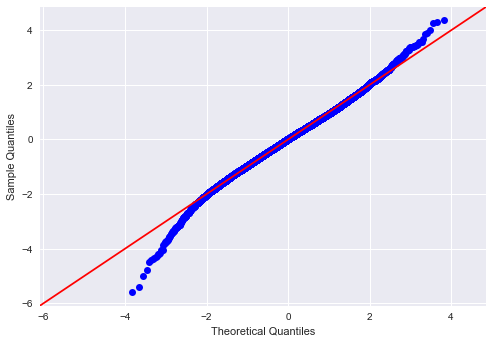

In [162]:

    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
 

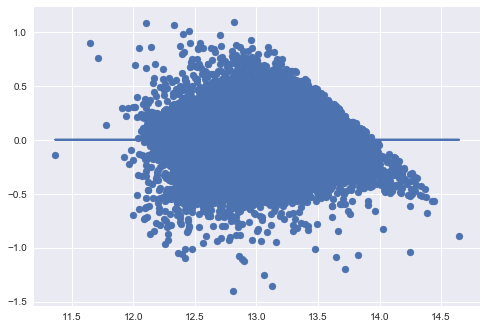

In [163]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [55]:
featset = ['price' , 'bedrooms' , 'sqft_living15' , 'sqft_lot15' ,'sqft_above']
df_scaling = df_house[featset].dropna()
df_scaling

price  bedrooms  sqft_living15  sqft_lot15  sqft_above
0      221900         3           1340        5650        1180
1      538000         3           1690        7639        2170
2      180000         2           2720        8062         770
3      604000         4           1360        5000        1050
4      510000         3           1800        7503        1680
...       ...       ...            ...         ...         ...
21608  360000         3           1530        1509        1530
21609  400000         4           1830        7200        2310
21610  402101         2           1020        2007        1020
21611  400000         3           1410        1287        1600
21612  325000         2           1020        1357        1020

[21613 rows x 5 columns]

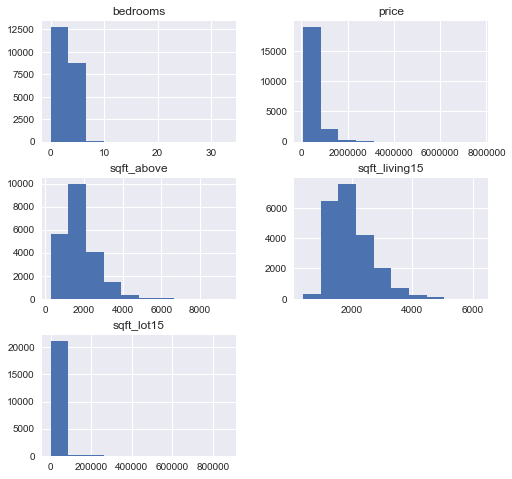

In [44]:
df_scaling.hist(figsize  = [8, 8]); 

In [56]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df_scaling)
df_std = std_scale.transform(df_scaling)
f = f'price~bedrooms+sqft_living15+sqft_lot15+sqft_above'
minmax_scale = preprocessing.MinMaxScaler().fit(df_scaling)
df_minmax = minmax_scale.transform(df_scaling)
df_minmax 

array([[0.01926557, 0.09090909, 0.16193426, 0.00574235, 0.09758772],
       [0.06072131, 0.09090909, 0.22216486, 0.00802712, 0.20614035],
       [0.01377049, 0.06060606, 0.3994149 , 0.00851302, 0.05263158],
       ...,
       [0.04289849, 0.06060606, 0.10686629, 0.00155764, 0.08004386],
       [0.04262295, 0.09090909, 0.17398038, 0.00073057, 0.14364035],
       [0.03278689, 0.06060606, 0.10686629, 0.00081098, 0.08004386]])

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
f = f'price~bedrooms+sqft_living15+sqft_lot15+sqft_above'
model = smf.ols(formula=f, data=df_minmax).fit()
model.summary()

PatsyError: Error evaluating factor: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
    price~bedrooms+sqft_living15+sqft_lot15+sqft_above
                   ^^^^^^^^^^^^^